<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم هوش مصنوعی</b>
<br>
<font size=5> استاد درس: دکتر مهدی قطعی و آقای بهنام یوسفی‌مهر
<br>
<font size=5> طراحان پروژه: ایلیا اسدی ، محمدرضا شیخ الاسلامی ، سید سینا نگهبان ، آرین جعفری
<br>
<font size=4> پاییز ۱۴۰۴
<hr>
</div>
</font>

### Import Libraries

In [ ]:
!pip install opendatasets
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.2 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from sklearn.model_selection import cross_val_score
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the dataset

You have to use the `opendatasets` library to download and then use it in either Google Colab or your local Jupyter Notebook

You can do the following steps:
- Create a Kaggle account
- Go to the Setting
- Find the API section
- Select **Create New Token**
- Now you have `Kaggle.json` file, which provides you your "kaggle username" and "kaggle key"

In [ ]:
od.download("https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset


100%|██████████| 896k/896k [00:00<00:00, 198MB/s]

In [ ]:
# read the csv file and make a data frame
# TODO

In [ ]:
df = pd.read_csv('./100000-diabetes-clinical-dataset/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


---
<font color="#ffcc00">Answer the following question:

- Give a strong reason that why for each sample, only one value amongst African-American, Asian, Caucasian, Hispanic and Other races, is 1? Furthermore, explain are there any other ways to show all these 5 columns together?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

## Preprocessing

### Explore the Dataset

Now that we've loaded the dataset, it's time to explore it!
<br/>
In Data Science, Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics—often using statistical graphics, plots, and other visualization tools.
<br/>
<br/>
EDA typically involves two main parts:
- Numerical statistics
- Visual analysis

Numerical statistics

describe the data, examine are there any missing values and find data types for each feature( you should use one cell for each of these tasks)

In [ ]:
# TODO

In [ ]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.isnull().sum()

,0
year,0
gender,0
age,0
location,0
race:AfricanAmerican,0
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

### Data Visualization and Visual Analysis

Now, we need to find some relations between features as well as between the target column and features. This helps us understand the shape of the data, detect outliers, and identify potential data quality issues or patterns.

#### How to detect whether our data is `Imbalanced` or not?

First, you have to to count the number of samples in each class, then plot both `pie chart` and `count plot` it to achieve a visualization of what you did

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


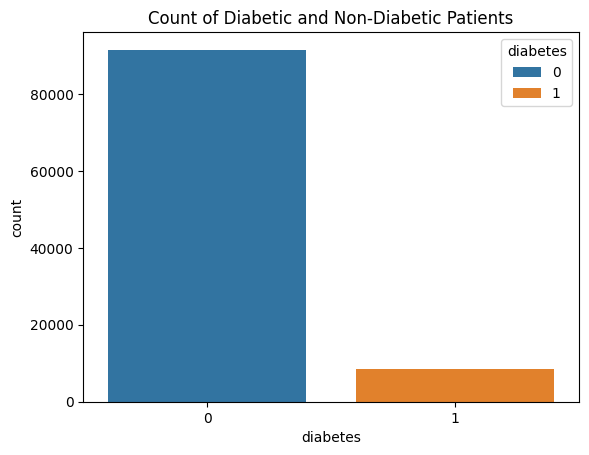

In [ ]:
# plot the count of diabetic and non-diabetic patients
sns.countplot(x='diabetes', data=df, hue="diabetes")
plt.title('Count of Diabetic and Non-Diabetic Patients')
plt.show()

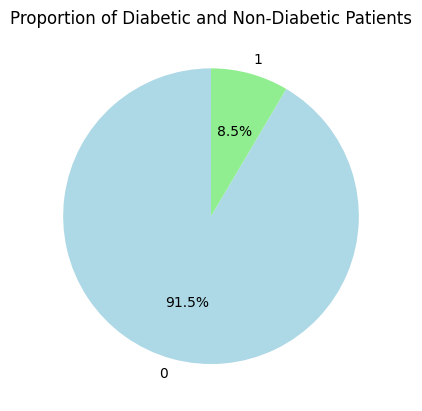

In [ ]:
# plot the pie chart of diabetic and non-diabetic patients
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Diabetic and Non-Diabetic Patients')
plt.ylabel('')
plt.show()

#### Exploring the relation between gender and diabetes

In [ ]:
# TODO

diabetes        0       1
gender                   
Female    54091.0  4461.0
Male      37391.0  4039.0
Other        18.0     NaN


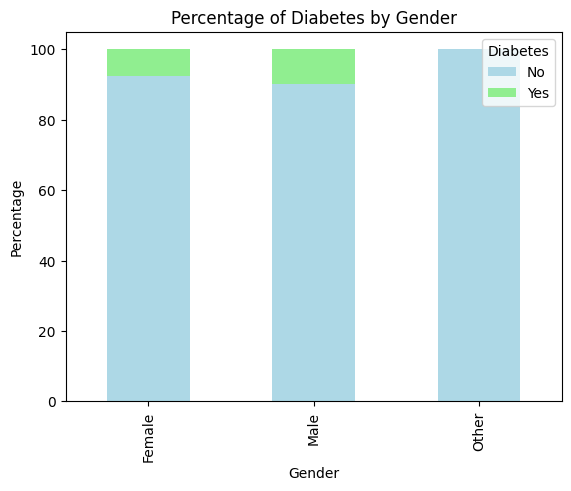

In [ ]:
# plot the percent relation between gender and diabetes
# calculate percentage
gender_diabetes = df.groupby(['gender', 'diabetes']).size().unstack()
print(gender_diabetes)
gender_diabetes_percent =  gender_diabetes.div(gender_diabetes.sum(axis=1), axis=0) * 100
gender_diabetes_percent.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()


---
<font color="#ffcc00">Answer the following question:

- What percentage of men have Diabetes?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### Exploring the relation between age and diabetes(Age Distribution by Diabetes Status)

In [ ]:
# TODO

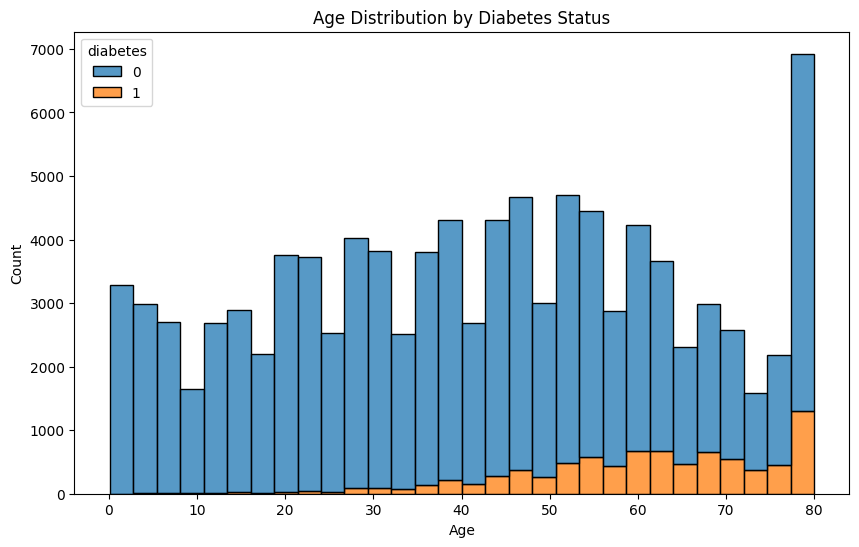

In [ ]:
# plot the relationship between age and diabetes in histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=30)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Exploring the relation between BMI and diabetes, hbA1c and diabetes and blood Glucose and diabetes

At this point, We need to find outliers and ommit them from the dataset, compare their medians, etc.

---
<font color="#ffcc00">Answer the following question:

- Which plot is appropriate for this purpose? Why?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

In [ ]:
# TODO

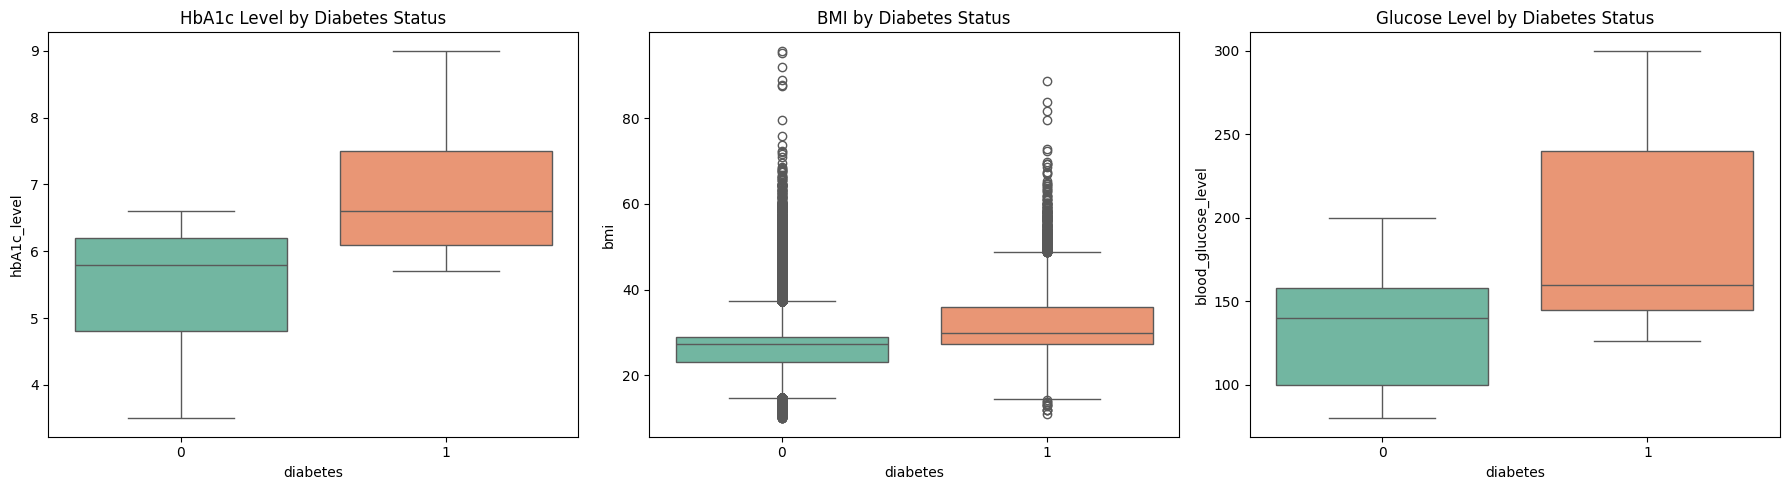

In [ ]:
# draw boxplot for hb1ac and bmi and glucose level
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='diabetes', y='hbA1c_level', data=df, palette='Set2')
plt.title('HbA1c Level by Diabetes Status')
plt.subplot(1, 3, 2)
sns.boxplot(x='diabetes', y='bmi', data=df, palette='Set2')
plt.title('BMI by Diabetes Status')
plt.subplot(1, 3, 3)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, palette='Set2')
plt.title('Glucose Level by Diabetes Status')
plt.tight_layout()
plt.show()

Now, remove outliers

In [ ]:
# TODO

In [ ]:
# remove outliers from hbA1c_level, bmi, blood_glucose_level
Q1 = df[['hbA1c_level', 'bmi', 'blood_glucose_level']].quantile(0.25)
Q3 = df[['hbA1c_level', 'bmi', 'blood_glucose_level']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[['hbA1c_level', 'bmi', 'blood_glucose_level']] < lower_bound) | (df[['hbA1c_level', 'bmi', 'blood_glucose_level']] > upper_bound)).any(axis=1)]
df.shape

(90387, 16)

#### Exploring the relation between hypertension, heart disease and smoking history and diabetes


In [ ]:
# TODO

#### relation between hypertension, heart disease and smoking history and diabetes based on precentage


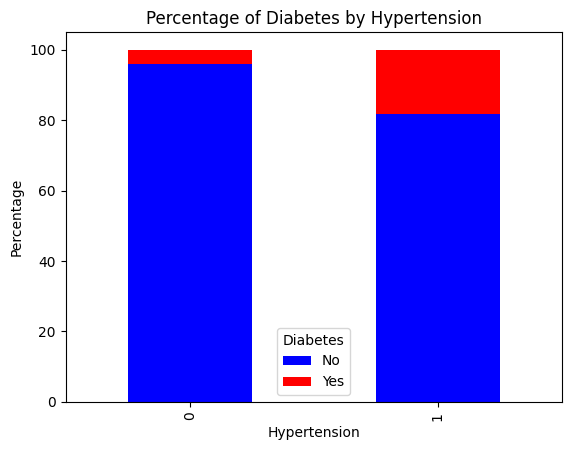

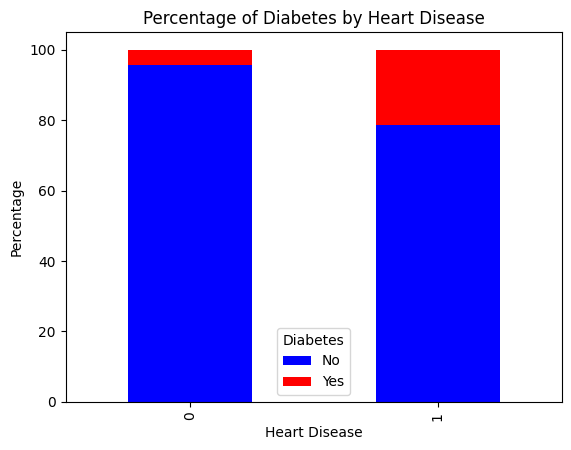

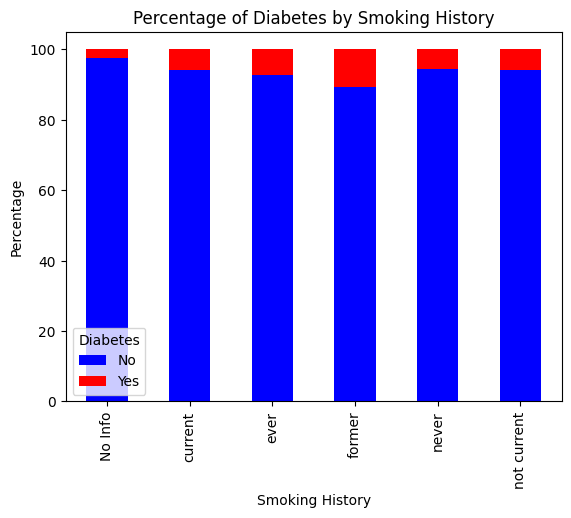

In [ ]:
conditions = ['hypertension', 'heart_disease', 'smoking_history']
for condition in conditions:
    condition_diabetes = df.groupby([condition, 'diabetes']).size().unstack()
    condition_diabetes_percent = condition_diabetes.div(condition_diabetes.sum(axis=1), axis=0) * 100
    condition_diabetes_percent.plot(kind='bar', stacked=True, color=['blue', 'red'])
    plt.title(f'Percentage of Diabetes by {condition.replace("_", " ").title()}')
    plt.xlabel(condition.replace("_", " ").title())
    plt.ylabel('Percentage')
    plt.legend(title='Diabetes', labels=['No', 'Yes'])
    plt.show()

---
<font color="#ffcc00">Answer the following questions:

- What percentage of samples with Heart Disease are Diabetic?
- Based on smoking history, which group of samples has the highest rate of Diabetes?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

In [ ]:
# TODO

#### Exploring the trend of diabetes based on year column

In [ ]:
# TODO

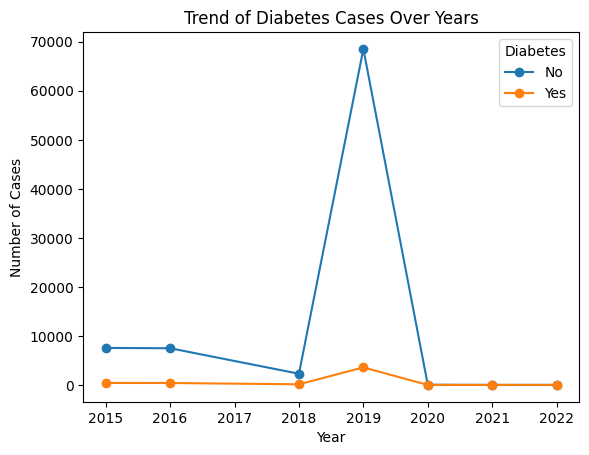

In [ ]:
# trend of diabetes based on year column
number_of_diabetic_cases_per_year = df.groupby(['year', 'diabetes']).size().unstack(fill_value=0)
number_of_diabetic_cases_per_year.plot(kind='line', marker='o')
plt.title('Trend of Diabetes Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

### Feature Selection and Feature Engineering

Based on the previous step, you have to decide which features could be helpful?

In [ ]:
# TODO

In [ ]:
df.drop(columns=['location'], inplace=True)

In [ ]:
df.drop(columns=['year'], inplace=True)
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
df.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,Female,52.0,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [ ]:
# group ages into bins
age_bins = [0, 15, 30, 45, 60, 75, 80]
age_labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-80']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
column_to_move = df.pop('age_group')
df.insert(2, 'age_group', column_to_move)
df.head()

,gender,age,age_group,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,30-44,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,Female,29.0,18-29,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,Male,18.0,18-29,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,Male,41.0,30-44,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,Female,52.0,45-59,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [ ]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Class I', 'Obesity Class II']
df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
column_to_move = df.pop('bmi_group')
df.insert(11, 'bmi_group', column_to_move)
df.head()

,gender,age,age_group,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi_group,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,30-44,0,0,0,0,1,0,0,never,Overweight,27.32,5.0,100,0
1,Female,29.0,18-29,0,1,0,0,0,0,0,never,Normal weight,19.95,5.0,90,0
2,Male,18.0,18-29,0,0,0,0,1,0,0,never,Normal weight,23.76,4.8,160,0
3,Male,41.0,30-44,0,0,1,0,0,0,0,never,Overweight,27.32,4.0,159,0
4,Female,52.0,45-59,1,0,0,0,0,0,0,never,Normal weight,23.75,6.5,90,0


#### Encode the Categorical features

In [ ]:
# TODO

In [ ]:
# One-hot encoding for group columns
group_columns = ['bmi_group', 'age_group', 'smoking_history']
df = pd.get_dummies(df, columns=group_columns, drop_first=True)
df.head()

# do binary encoding for gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,age_group_18-29,age_group_30-44,age_group_45-59,age_group_60-74,age_group_75-80,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1,32.0,0,0,0,0,1,0,0,27.32,...,False,True,False,False,False,False,False,False,True,False
1,1,29.0,0,1,0,0,0,0,0,19.95,...,True,False,False,False,False,False,False,False,True,False
2,0,18.0,0,0,0,0,1,0,0,23.76,...,True,False,False,False,False,False,False,False,True,False
3,0,41.0,0,0,1,0,0,0,0,27.32,...,False,True,False,False,False,False,False,False,True,False
4,1,52.0,1,0,0,0,0,0,0,23.75,...,False,False,True,False,False,False,False,False,True,False


---
<font color="#ffcc00">Answer the following question:

- Explain the reason why you have chosen these encoding methods.

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### Plot the `Correlation Matrix`

In [ ]:
# TODO

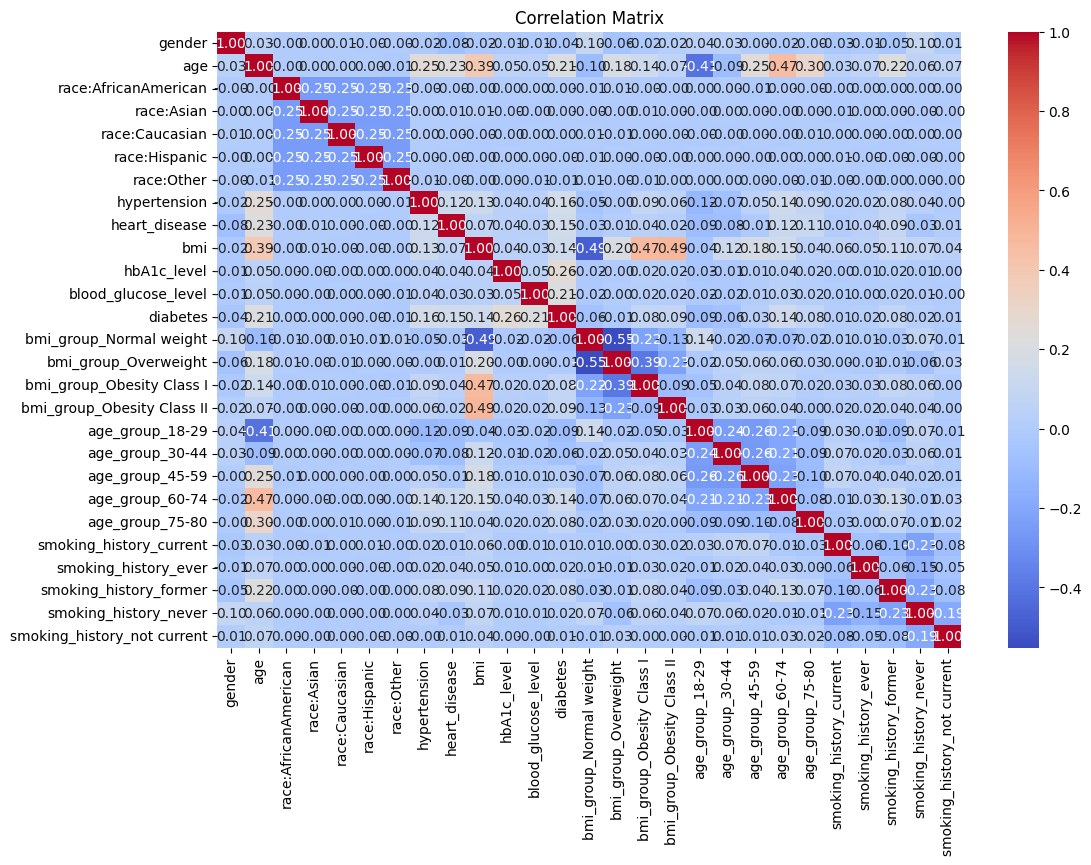

In [ ]:
# correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

---
<font color="#ffcc00">Answer the following question:

- What can you find out from this correlation matrix?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### Split data into train set and test set

In [ ]:
# TODO

In [ ]:
# split data into train and test
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72296, 26), (18074, 26), (72296,), (18074,))



```
# This is formatted as code
```

#### Resampling

In [ ]:
# TODO

In [ ]:
# resample the data to have balanced classes
undersampler = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

#sm = SMOTEENN(random_state=42,n_jobs=-1)
#X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

df_train_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
df_train_resampled['diabetes'] = y_resampled.values
X_resampled.shape, y_resampled.shape

((72296, 26), (72296,))

---
<font color="#ffcc00">Answer the following question:

- Why didn't we resample the data before splitting it into train/test set?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### Feature Scaling

In [ ]:
# TODO

In [ ]:
# scale the data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
df_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_resampled.columns)
df_train_resampled_scaled['diabetes'] = y_resampled.values
df_train_resampled_scaled.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,age_group_30-44,age_group_45-59,age_group_60-74,age_group_75-80,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,0.848469,-0.728746,-0.502178,-0.499455,-0.500017,-0.498071,1.998894,-0.266436,-0.192527,-0.711000,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
1,0.848469,0.735552,-0.502178,2.002181,-0.500017,-0.498071,-0.500277,-0.266436,-0.192527,1.556125,...,-0.500903,1.885835,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
2,-1.178593,-0.151901,-0.502178,2.002181,-0.500017,-0.498071,-0.500277,-0.266436,-0.192527,0.201579,...,1.996394,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
3,-1.178593,-1.438708,-0.502178,2.002181,-0.500017,-0.498071,-0.500277,-0.266436,-0.192527,0.201579,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
4,-1.178593,-0.994982,-0.502178,-0.499455,1.999931,-0.498071,-0.500277,-0.266436,-0.192527,-0.477740,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,-0.732716,-0.260583,0


In [ ]:
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_test_scaled['diabetes'] = y_test.values
df_test_scaled.head()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,age_group_30-44,age_group_45-59,age_group_60-74,age_group_75-80,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,0.848469,1.223652,-0.502178,-0.499455,-0.500017,-0.498071,1.998894,-0.266436,-0.192527,0.483947,...,-0.500903,-0.530269,2.359194,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
1,-1.178593,-1.749317,-0.502178,-0.499455,-0.500017,2.007744,-0.500277,-0.266436,-0.192527,-1.891623,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
2,0.848469,-0.950609,-0.502178,-0.499455,-0.500017,-0.498071,1.998894,-0.266436,-0.192527,-1.152966,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,-0.201543,-0.314283,1.364786,-0.260583,0
3,-1.178593,-0.773118,1.991327,-0.499455,-0.500017,-0.498071,-0.500277,-0.266436,-0.192527,0.201579,...,-0.500903,-0.530269,-0.423874,-0.187684,3.151834,-0.201543,-0.314283,-0.732716,-0.260583,0
4,-1.178593,1.711751,1.991327,-0.499455,-0.500017,-0.498071,-0.500277,-0.266436,-0.192527,0.232271,...,-0.500903,-0.530269,-0.423874,-0.187684,-0.317276,4.961725,-0.314283,-0.732716,-0.260583,0


In [ ]:
df.describe()

,gender,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000,90370.000000
mean,0.581343,41.409836,0.202058,0.200376,0.199004,0.198827,0.199734,0.065663,0.035631,26.317339,5.456331,134.571661,0.049740
std,0.493342,22.559391,0.401538,0.400284,0.399253,0.399120,0.399803,0.247694,0.185370,4.878691,0.994841,35.198153,0.217408
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.710000,3.500000,80.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.370000,4.800000,100.000000,0.000000
50%,1.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.280000,6.200000,158.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.500000,8.200000,240.000000,1.000000




```
# This is formatted as code
```

# Clustering


Clustering is an **unsupervised learning** technique that aims to **group similar data points** into clusters such that:
- Points in the same cluster are similar to each other.
- Points in different clusters are as different as possible.

Unlike supervised learning, clustering does not require labeled data. It helps uncover hidden patterns, structures, or natural groupings in data.

In this notebook, you will perform clustering using:
- **K-Means**
- **Agglomerative (Hierarchical) Clustering**
- **DBSCAN**

and evaluate them using various **clustering metrics**.

---
<font color="#ffcc00">Answer the following question:

- Why might clustering be useful for a medical dataset like the one in this notebook?  
- Can you think of a situation where clustering could fail to find meaningful patterns?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

Before applying clustering algorithms, we often perform dimensionality reduction, and one of the most common techniques is **Principal Component Analysis (PCA)**.

### PCA

PCA (Principal Component Analysis) is a linear transformation method that reduces the number of features in a dataset while preserving as much variance as possible.
It works by identifying the directions (called principal components) along which the data varies the most.

####  Why We Use PCA Here
- **Noise reduction:** PCA filters out small variations that might come from noise, helping clustering algorithms to focus on the true structure of the data.

- **Improved visualization:** When we reduce dimensions to 2 or 3 components, we can visualize clusters in a 2D/3D plot.

- **Efficiency:** Many clustering algorithms (like K-Means) work faster and more accurately when data has fewer, informative dimensions.  
- **Better cluster structure:** Helps algorithms detect patterns more clearly.

👉 **Hint:**  
In your code, PCA is applied before clustering, which means you are working with transformed, lower-dimensional data that helps clustering algorithms perform better and visualize results clearly.


In [ ]:
## TODO: Reduce the dataset to 2 components using PCA and Visualize the data in a 2D scatter plot, coloring points by Diabetes labels.
# How much of the total variance is explained by the two principal components?

In [ ]:
# TA Version

pca_init = PCA(n_components=2, random_state=42)
X_pca_train = pca_init.fit_transform(X_train_resampled_scaled)
X_pca_test = pca_init.transform(X_test_scaled)

# Fraction of variance explained by each component
print("Explained variance ratio per component:", pca_init.explained_variance_ratio_)

# Cumulative explained variance
print("Cumulative explained variance:", np.cumsum(pca_init.explained_variance_ratio_))

Explained variance ratio per component: [0.10052786 0.0626225 ]
Cumulative explained variance: [0.10052786 0.16315036]


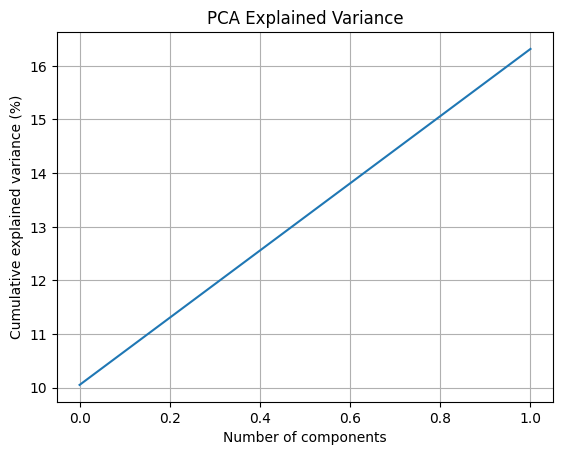

In [ ]:

plt.plot(np.cumsum(pca_init.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


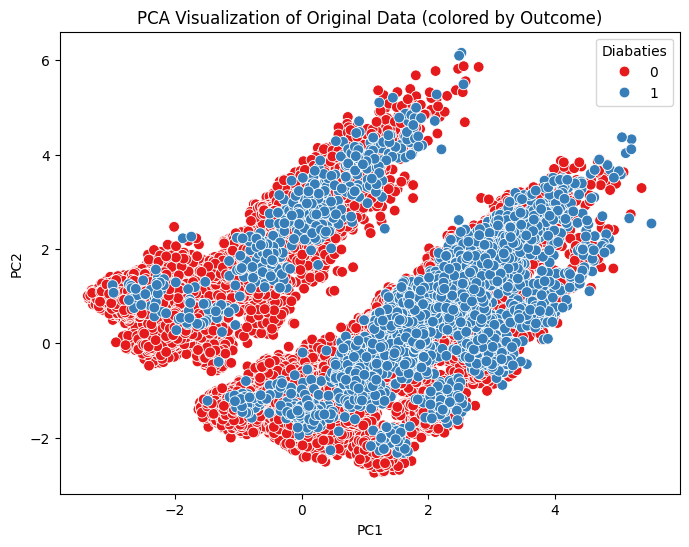

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_train[:,0], y=X_pca_train[:,1], hue=y_resampled, palette='Set1', s=60)
plt.title("PCA Visualization of Original Data (colored by Outcome)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Diabaties')
plt.show()

---
<font color="#ffcc00">Answer the following question:

- How does reducing the number of dimensions help clustering algorithms?  
- What might happen if you skip PCA and apply clustering directly to high-dimensional data?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

After dimensionality reduction, we can group similar data points into clusters.\
Let’s review the most common clustering algorithms you might see in this notebook.

### Clustering Algorithms

#### 1. K-Means

K-Means is one of the simplest and most popular clustering algorithms. It tries to partition the data into `k` clusters by minimizing the sum of squared distances between each point and its cluster center (centroid).


**Steps:**

1. Choose the number of clusters `k`.
2. Initialize `k` random centroids.
3. Assign each point to the nearest centroid.
4. Recalculate centroids as the mean of all points in the cluster.
5. Repeat until centroids no longer change significantly.

In [ ]:
## TODO: Implement K-Means clustering algorithm using the PCA-transformed data on both training and test data
# and visualize the cluster results in 2D

In [ ]:
## TA Version

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans_train = kmeans.fit_predict(X_pca_train)
clusters_kmeans_test = kmeans.predict(X_pca_test)

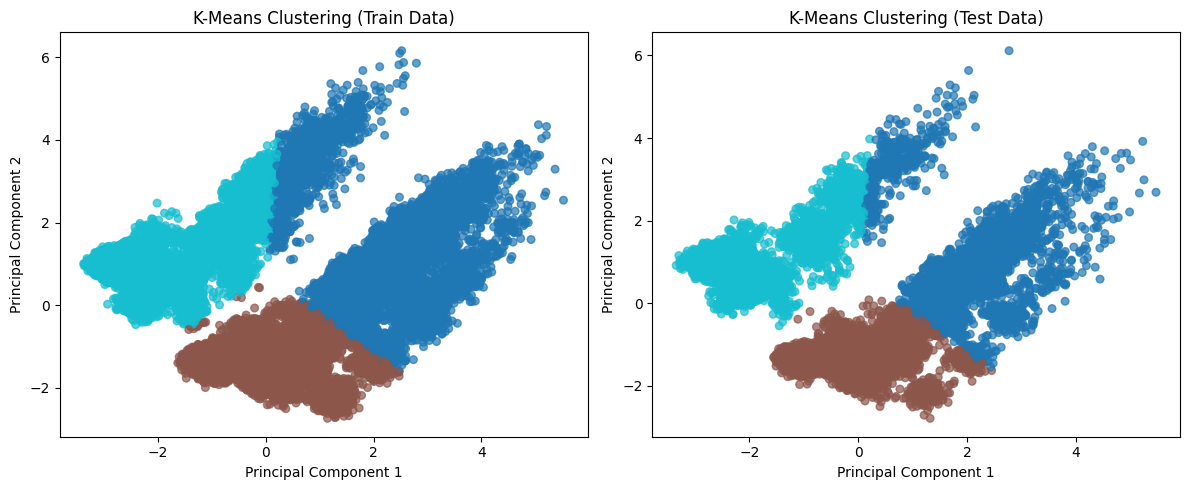

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=clusters_kmeans_train, cmap='tab10', s=30,alpha=0.7)
plt.title('K-Means Clustering (Train Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=clusters_kmeans_test, cmap='tab10', s=30,alpha=0.7)
plt.title('K-Means Clustering (Test Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


In [ ]:
unique_labels, counts = np.unique(clusters_kmeans_train, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} rows")

Cluster 0: 19727 rows
Cluster 1: 31080 rows
Cluster 2: 21489 rows


---
<font color="#ffcc00">**Answer the following questions:**</font>

- How could you determine the optimal value of *k*?  
  (After answering this question, go to the [Choosing the Number of Clusters](#choosing-the-number-of-clusters) section and implement the **Elbow Method** to find the best *k* for your dataset.)

- Why is feature scaling important before using K-Means?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 2. Agglomerative Hierarchical Clustering

Agglomerative clustering follows a **bottom-up** approach.  
Initially, each point is its own cluster, and the algorithm keeps merging the closest clusters until one big cluster remains.
You can visualize this process using a **dendrogram**.


**Two main types:**

- **Agglomerative:**  Start with each point as a cluster, then merge them.

- **Divisive:**  Start with one cluster, then split it.

**Linkage methods:**

- **Single linkage:** uses the minimum distance between clusters.

- **Complete linkage:** uses the maximum distance.

- **Average linkage:** uses the mean distance.

💡 **Note:**  
Hierarchical clustering can be computationally expensive because it calculates the distance matrix for all samples and repeatedly merges clusters.  
If a dataset is large, this process may take a long time or even fail due to memory limits — you may try running it on a **smaller subset of the data** to visualize the results faster.

In [ ]:
## TODO: Implement Agglomerative Hierarchical Clustering algorithm using the PCA-transformed data on both training and test data
#  and visualize the cluster results in 2D

---
<font color="#ffcc00">Answer the following question:

- How does hierarchical clustering differ from K-Means conceptually?  
- What can you interpret from the dendrogram structure?
- Why might hierarchical clustering take a long time to run on larger datasets?  

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 3. DBSCAN

**DBSCAN** is a **density-based algorithm** that groups together points that are closely packed, while marking points that lie alone as outliers.


**Key Parameters:**
- `eps`: Maximum distance between neighboring points.  
- `min_samples`: Minimum number of neighbors to form a dense region.

**How it works:**
1. For each point, check how many points are within `eps` distance.
2. If there are at least `min_samples` points, mark it as a **core point** and expand the cluster.
3. Points reachable from a core point belong to the same cluster.
4. Points that don’t belong to any cluster are considered **noise**.

In [ ]:
## TODO: Implement DBSCAN Clustering algorithm using the PCA-transformed data on both training and test data
#  and visualize the cluster results in 2D

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=30)  # adjust eps and min_samples
cluster_dbscan_train = dbscan.fit_predict(X_pca_train)
cluster_dbscan_test = dbscan.fit_predict(X_pca_test)

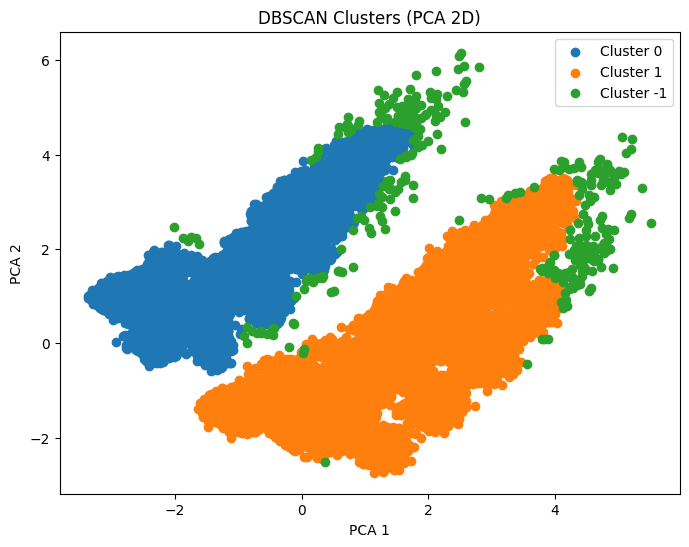

In [ ]:
plt.figure(figsize=(8,6))
unique_labels = set(cluster_dbscan_train)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (cluster_dbscan_train == k)
    xy = X_pca_train[class_member_mask]


    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}')

plt.title('DBSCAN Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [ ]:
unique_labels, counts = np.unique(cluster_dbscan_train, return_counts=True)
print("Cluster counts:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} rows")

Cluster counts:
Cluster -1: 356 rows
Cluster 0: 22811 rows
Cluster 1: 49129 rows


---
<font color="#ffcc00">Answer the following question:

- Why doesn’t DBSCAN require specifying the number of clusters (*k*)?  
- What happens when `eps` is too small or too large?  
- Why might DBSCAN be better than K-Means for irregular data shapes?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Clustering Evaluation Metrics

Evaluating clustering results is challenging because we typically don’t have labels.  
Metrics fall into two categories: **Internal Metrics** (no true labels needed) and **External Metrics** (require ground truth labels).

#### 1. Internal Evaluation Metrics

Internal metrics evaluate the **structure of the clusters** using only the data itself — no true labels are needed.


##### 🧮 1. Silhouette Score

Measures how well a point fits within its own cluster compared to others.
$$
Silhouette = \frac{b - a}{\max(a, b)}
$$

where:  
- `a` = average distance to points in the same cluster  
- `b` = average distance to points in the nearest cluster  

**Range:** -1 to +1 :  

- Values close to **+1** mean well-separated clusters.  
- Values near **0** mean overlapping clusters.  
-  Negative values mean wrong cluster assignment.

##### 🧮 2. Davies–Bouldin Index (DBI)


Measures the average similarity between each cluster and its most similar one.  
A **lower DBI** indicates better clustering — it rewards clusters that are compact and far apart.


##### 🧮 3. Calinski–Harabasz Index


Also called the **Variance Ratio Criterion**, it compares **between-cluster dispersion** to **within-cluster dispersion**.  
Higher values indicate better clustering performance.

In [ ]:
#TODO: Evaluate the performance of ALL 3 above clustering algorithms using Silhouette Score, DBI and Calinski–Harabasz Index
# on both train and test dataset


##### Kmeans Internal Evaluation metrics

In [ ]:
# TODO :

In [ ]:
# TA Version :
sil_score_kmeans_train = silhouette_score(X_pca_train, clusters_kmeans_train)
ch_score_kmeans_train  = calinski_harabasz_score(X_pca_train, clusters_kmeans_train)
db_score_kmeans_train  = davies_bouldin_score(X_pca_train, clusters_kmeans_train)

print(f"Silhouette Kmeans Train Score: {sil_score_kmeans_train:.3f}")
print(f"Calinski-Harabasz  Kmeans Train Index: {ch_score_kmeans_train:.3f}")
print(f"Davies-Bouldin Kmeans Train Index: {db_score_kmeans_train:.3f}")

Silhouette Kmeans Train Score: 0.520
Calinski-Harabasz  Kmeans Train Index: 92254.867
Davies-Bouldin Kmeans Train Index: 0.679


In [ ]:
sil_score_kmeans_test = silhouette_score(X_pca_test, clusters_kmeans_test)
ch_score_kmeans_test = calinski_harabasz_score(X_pca_test, clusters_kmeans_test)
db_score_kmeans_test = davies_bouldin_score(X_pca_test, clusters_kmeans_test)

print(f"Silhouette Kmeans Test  Score: {sil_score_kmeans_test:.3f}")
print(f"Calinski-Harabasz  Kmeans Test Index: {ch_score_kmeans_test:.3f}")
print(f"Davies-Bouldin  Kmeans Test Index: {db_score_kmeans_test:.3f}")

Silhouette Kmeans Test  Score: 0.521
Calinski-Harabasz  Kmeans Test Index: 23044.053
Davies-Bouldin  Kmeans Test Index: 0.678


##### Agglomerative Hierarchical Internal Evaluation metrics

In [ ]:
# TODO :

##### DBSCAN Internal Evaluation metrics

In [ ]:
# TODO :

In [ ]:
# TA VERSION :

sil_score_dbscan_train = silhouette_score(X_pca_train, cluster_dbscan_train)
ch_score_dbscan_train  = calinski_harabasz_score(X_pca_train, cluster_dbscan_train)
db_score_dbscan_train  = davies_bouldin_score(X_pca_train, cluster_dbscan_train)

print(f"Silhouette dbscan_ Train Score: {sil_score_dbscan_train:.3f}")
print(f"Calinski-Harabasz  dbscan_ Train Index: {ch_score_dbscan_train:.3f}")
print(f"Davies-Bouldin dbscan_ Train Index: {db_score_dbscan_train:.3f}")

Silhouette dbscan_ Train Score: 0.454
Calinski-Harabasz  dbscan_ Train Index: 31725.557
Davies-Bouldin dbscan_ Train Index: 0.866


In [ ]:
sil_score_dbscan_test = silhouette_score(X_pca_test, cluster_dbscan_test)
ch_score_dbscan_test = calinski_harabasz_score(X_pca_test, cluster_dbscan_test)
db_score_dbscan_test = davies_bouldin_score(X_pca_test, cluster_dbscan_test)

print(f"Silhouette dbscan Test  Score: {sil_score_dbscan_test:.3f}")
print(f"Calinski-Harabasz  dbscan Test Index: {ch_score_dbscan_test:.3f}")
print(f"Davies-Bouldin  dbscan Test Index: {db_score_dbscan_test:.3f}")

Silhouette dbscan Test  Score: 0.173
Calinski-Harabasz  dbscan Test Index: 4493.915
Davies-Bouldin  dbscan Test Index: 1.044


---
<font color="#ffcc00">Answer the following question:

- Why is Silhouette Score often preferred for visualization-based clustering evaluation?  
- What are the limitations of these internal metrics?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 2. External Evaluation Metrics


When we **have ground-truth labels** (for example, synthetic or labeled datasets), we can evaluate how similar our predicted clusters are to the real labels.


##### 🧮 1. Adjusted Rand Index (ARI)


Compares the similarity between two clusterings (predicted vs. true labels) by counting how many pairs of points are assigned consistently.

- ARI = 1 → Perfect agreement.  
- ARI = 0 → Random labeling.  
- ARI < 0 → Worse than random.

It is “adjusted” for chance, meaning random clustering should give a score near 0.

##### 🧮 2. Normalized Mutual Information (NMI)

Measures the amount of **shared information** between predicted clusters and true labels.  
It is based on the concept of *mutual information* from information theory.

Values range from 0 (no agreement) to 1 (perfect match).


In [ ]:
#TODO: Evaluate the performance of ALL 3 above clustering algorithms using ARI and NMI on both train and test dataset


##### Kmeans External Evaluation metrics

In [ ]:
# TODO :

In [ ]:
# TA version :

ari_kmeans_train = adjusted_rand_score(y_resampled, clusters_kmeans_train)
nmi_kmeans_train = normalized_mutual_info_score(y_resampled, clusters_kmeans_train)

print(f"Adjusted Rand  Kmeans Train Index: {ari_kmeans_train:.3f}")
print(f"Normalized Mutual Information Kmeans Train : {nmi_kmeans_train:.3f}")

Adjusted Rand  Kmeans Train Index: 0.018
Normalized Mutual Information Kmeans Train : 0.040


In [ ]:

ari_kmeans_test = adjusted_rand_score(y_test, clusters_kmeans_test)
nmi_kmeans_test = normalized_mutual_info_score(y_test, clusters_kmeans_test)

print(f"Adjusted Rand  Kmeans Test Index: {ari_kmeans_test:.3f}")
print(f"Normalized Mutual Information  Kmeans Test: {nmi_kmeans_test:.3f}")

Adjusted Rand  Kmeans Test Index: 0.019
Normalized Mutual Information  Kmeans Test: 0.039


##### Agglomerative Hierarchical External Evaluation metrics

In [ ]:
# TODO :

##### DBSCAN External Evaluation metrics

In [ ]:
# TODO :

In [ ]:
# TA version :
ari_dbscan_train = adjusted_rand_score(y_resampled, cluster_dbscan_train)
nmi_dbscan_train = normalized_mutual_info_score(y_resampled, cluster_dbscan_train)

print(f"Adjusted Rand dbscan Train Index: {ari_dbscan_train:.3f}")
print(f"Normalized Mutual Information dbscan Train : {nmi_dbscan_train:.3f}")

Adjusted Rand dbscan Train Index: -0.021
Normalized Mutual Information dbscan Train : 0.017


In [ ]:

ari_dbscan_test = adjusted_rand_score(y_test, cluster_dbscan_test)
nmi_dbscan_test = normalized_mutual_info_score(y_test, cluster_dbscan_test)

print(f"Adjusted Rand dbscan Test Index: {ari_dbscan_test:.3f}")
print(f"Normalized Mutual Information dbscan Test: {nmi_dbscan_test:.3f}")

Adjusted Rand dbscan Test Index: 0.006
Normalized Mutual Information dbscan Test: 0.024


---
<font color="#ffcc00">Answer the following question:

- When would you use external metrics instead of internal ones?  
- Why is it important that external metrics are *label-invariant*?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

<a name="choosing-the-number-of-clusters"></a>
### Choosing the Number of Clusters


Choosing the right number of clusters (`k`) is a crucial part of clustering, especially for **K-Means**.


#### What is the Elbow Method?

The **Elbow Method** is a visual technique used to determine the optimal number of clusters.

It is based on analyzing the **Within-Cluster Sum of Squares (WCSS)** — the total squared distance between each point and its assigned cluster centroid.

As the number of clusters increases:
- WCSS **decreases** (clusters get smaller and more compact),
- But the **rate of improvement** slows down.

When plotted, WCSS typically forms a **curve with a sharp bend**, resembling an “elbow.”  
The point where the reduction in WCSS starts to slow down is considered the **optimal number of clusters**.


#### How the Elbow Method Works:
1. Run K-Means with different `k` values (e.g., 1–10).
2. Compute the **inertia** (sum of squared distances of points to their nearest centroid) for each `k`.
3. Plot `k` vs. inertia.
4. Look for the “elbow point” — where the decrease in inertia slows down sharply

That point represents a good balance between having too few and too many clusters.


In [ ]:
# TODO : Implement the Elbow Method on chart to determine the best value of `k` for your dataset.


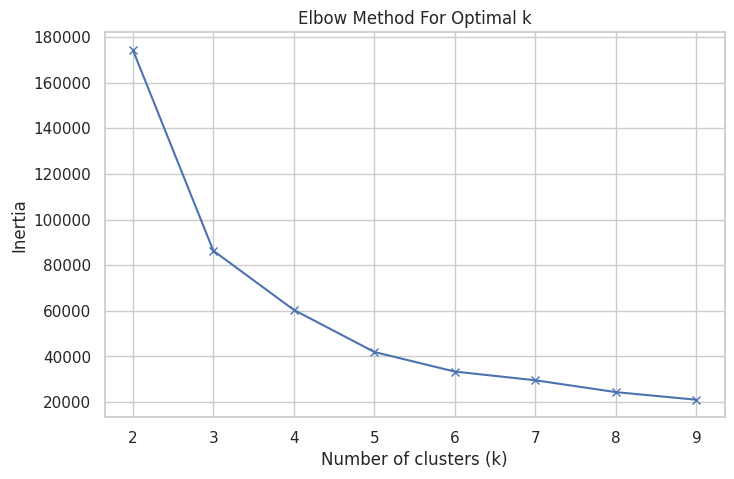

In [ ]:
# TA version :

inertia_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_dbscan_train = kmeans.fit_predict(X_pca_train)
    inertia_scores.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

---
<font color="#ffcc00">Answer the following question:

-  Why does inertia decrease as we increase the number of clusters?  
- How can you visually detect the optimal `k` on the Elbow plot?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

# Classification on each cluster

After clustering our diabetic patients into three groups based on their medical and lifestyle features, we move to the classification phase.
The goal of this part is to train separate machine learning classifiers for each cluster, since each group of patients may show different relationships between the features and the target label (e.g., diabetes outcome).

### Preparing Cluster-Based Data for Classification


Before training the classification models, we must separate the dataset according to the cluster labels obtained from the **K-Means** algorithm.
Each cluster represents a distinct subgroup of patients, and we will train a separate classifier for each one. Use the **scaled training data** and **not the data resulted from PCA algorithm**.

In [ ]:
# TODO

In [ ]:
# TA version

X_train_cluster_0, y_train_cluster_0 = X_train_resampled_scaled[clusters_kmeans_train == 0], y_resampled[clusters_kmeans_train == 0]
X_test_cluster_0, y_test_cluster_0 = X_test_scaled[clusters_kmeans_test == 0], y_test[clusters_kmeans_test == 0]

X_train_cluster_1, y_train_cluster_1 = X_train_resampled_scaled[clusters_kmeans_train == 1], y_resampled[clusters_kmeans_train == 1]
X_test_cluster_1, y_test_cluster_1 = X_test_scaled[clusters_kmeans_test == 1], y_test[clusters_kmeans_test == 1]

X_train_cluster_2, y_train_cluster_2 = X_train_resampled_scaled[clusters_kmeans_train == 2], y_resampled[clusters_kmeans_train == 2]
X_test_cluster_2, y_test_cluster_2 = X_test_scaled[clusters_kmeans_test == 2], y_test[clusters_kmeans_test == 2]

clusters_train = [X_train_cluster_0, X_train_cluster_1, X_train_cluster_2]
clusters_test = [X_test_cluster_0, X_test_cluster_1, X_test_cluster_2]
clusters_y_train = [y_train_cluster_0, y_train_cluster_1, y_train_cluster_2]
clusters_y_test = [y_test_cluster_0, y_test_cluster_1, y_test_cluster_2]

### Classification Algorithms

**Note:** Evaluation is a critical step in any machine learning pipeline.
For each model, you should measure key performance metrics that capture different aspects of model.  

For each model (Random Forest, Logistic Regression, SVM, and XGBoost), perform the following steps:

1. Compute the evaluation metrics for each cluster using:

    - accuracy_score
    - precision_score
    - recall_score
    - f1_score

2. Plot a confusion matrix for each cluster to visualize how predictions are distributed among classes.
You can use ConfusionMatrixDisplay.from_predictions() from sklearn.metrics.

3. Create a bar plot comparing metric values (Accuracy, Precision, Recall, F1) for the three clusters of the same model.

####   1. Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for classification tasks.
It models the probability that a given input belongs to a particular class by using the logistic (sigmoid) function.  
Despite its name, it is not used for regression but for predicting categorical outcomes (such as 0 or 1).
It is most effective when there is a linear relationship between the input features and the target variable.

Implement a Logistic Regression classifier for each cluster and evaluate it on test data.

In [ ]:
# TODO


 Logistic Regression - Cluster 0 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4200
           1       0.78      0.44      0.56       660

    accuracy                           0.91      4860
   macro avg       0.85      0.71      0.76      4860
weighted avg       0.90      0.91      0.90      4860



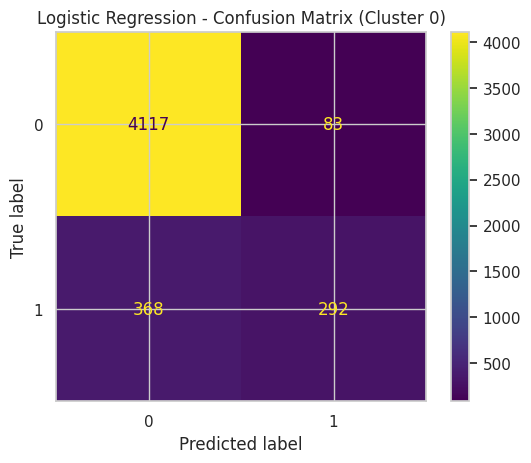


 Logistic Regression - Cluster 1 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7590
           1       0.91      0.19      0.32       154

    accuracy                           0.98      7744
   macro avg       0.95      0.60      0.66      7744
weighted avg       0.98      0.98      0.98      7744



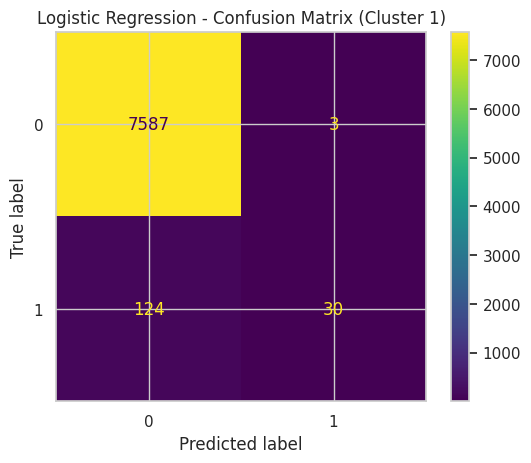


 Logistic Regression - Cluster 2 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5385
           1       0.75      0.14      0.24        85

    accuracy                           0.99      5470
   macro avg       0.87      0.57      0.62      5470
weighted avg       0.98      0.99      0.98      5470



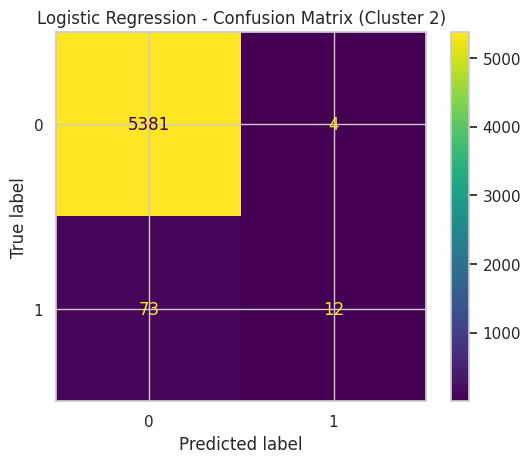

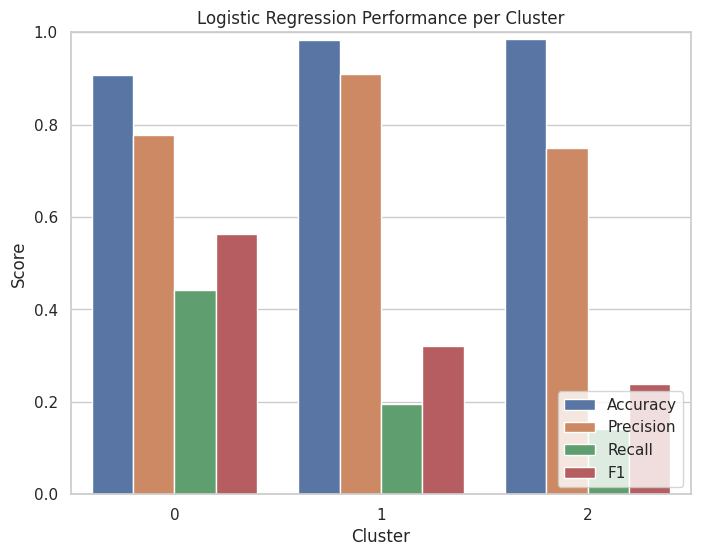

In [ ]:
# TA version

log_reg = LogisticRegression(max_iter=1000)
logreg_preds = {}

metrics_funcs = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred)
}

results_model = []
model_name = "Logistic Regression"

for cls_id in range(3):
    X_train, y_train = clusters_train[cls_id], clusters_y_train[cls_id]
    X_test_cls, y_test_cls = clusters_test[cls_id], clusters_y_test[cls_id]

    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test_cls)
    logreg_preds[cls_id] = y_pred

    print(f"\n {model_name} - Cluster {cls_id} ")
    print(classification_report(y_test_cls, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test_cls, y_pred)
    plt.title(f"{model_name} - Confusion Matrix (Cluster {cls_id})")
    plt.show()

    metrics_values = {metric: func(y_test_cls, y_pred) for metric, func in metrics_funcs.items()}
    metrics_values["Cluster"] = cls_id
    results_model.append(metrics_values)

df_model = pd.DataFrame(results_model)
df_melted = pd.melt(df_model, id_vars=["Cluster"], var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Score", hue="Metric", data=df_melted)
plt.title(f"{model_name} Performance per Cluster")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


---
<font color="#ffcc00">Answer the following questions:

- What is the main assumption behind Logistic Regression regarding the relationship between features and the target variable?
- What are some limitations of Logistic Regression when dealing with non-linear data?
- What are the formulas for Accuracy, Precision, Recall, F1-score?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 2. Random Forest

Random Forest is an ensemble learning algorithm that combines the results of many decision trees to make a final prediction.  
Each tree in the forest is trained on a random subset of the data and features, which helps the model avoid overfitting and improves generalization.  
Random Forest can capture non-linear relationships and performs well on both classification and regression problems.

Implement a Random Forest classifier for each cluster and evaluate it on test data.

In [ ]:
# TODO


 Random Forest - Cluster 0 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4200
           1       0.95      0.52      0.68       660

    accuracy                           0.93      4860
   macro avg       0.94      0.76      0.82      4860
weighted avg       0.93      0.93      0.92      4860



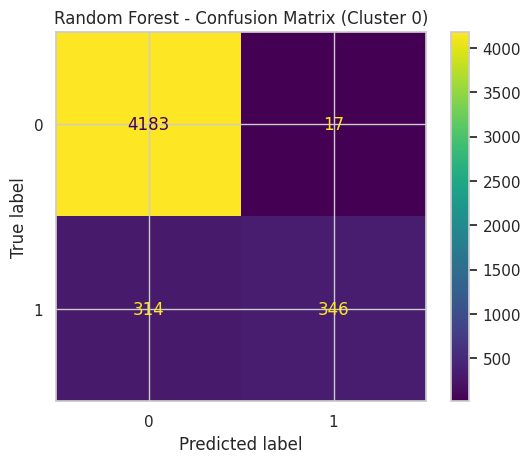


 Random Forest - Cluster 1 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7590
           1       0.93      0.45      0.61       154

    accuracy                           0.99      7744
   macro avg       0.96      0.72      0.80      7744
weighted avg       0.99      0.99      0.99      7744



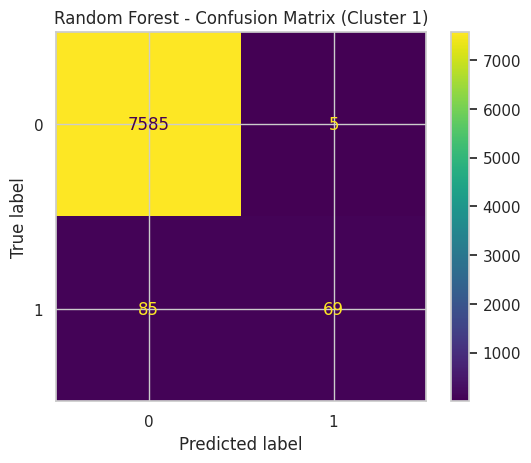


 Random Forest - Cluster 2 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5385
           1       1.00      0.38      0.55        85

    accuracy                           0.99      5470
   macro avg       1.00      0.69      0.77      5470
weighted avg       0.99      0.99      0.99      5470



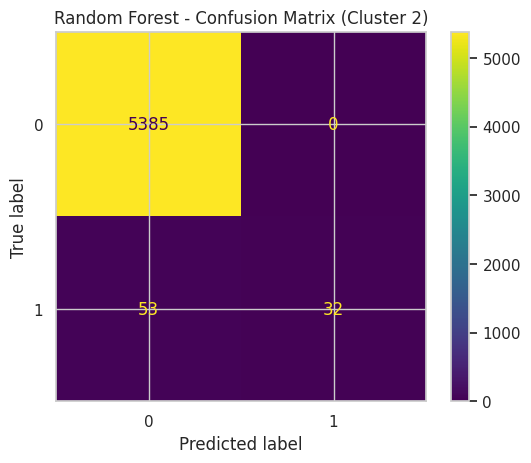

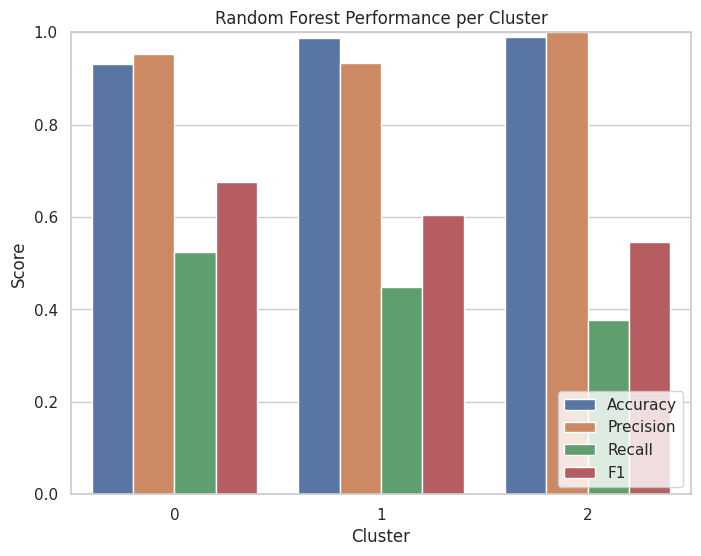

In [ ]:
# TA version

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_preds = {}

metrics_funcs = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred)
}

results_model = []
model_name = "Random Forest"

for cls_id in range(3):
    X_train, y_train = clusters_train[cls_id], clusters_y_train[cls_id]
    X_test_cls, y_test_cls = clusters_test[cls_id], clusters_y_test[cls_id]

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test_cls)
    rf_preds[cls_id] = y_pred

    print(f"\n {model_name} - Cluster {cls_id} ")
    print(classification_report(y_test_cls, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test_cls, y_pred)
    plt.title(f"{model_name} - Confusion Matrix (Cluster {cls_id})")
    plt.show()

    metrics_values = {metric: func(y_test_cls, y_pred) for metric, func in metrics_funcs.items()}
    metrics_values["Cluster"] = cls_id
    results_model.append(metrics_values)

df_model = pd.DataFrame(results_model)
df_melted = pd.melt(df_model, id_vars=["Cluster"], var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Score", hue="Metric", data=df_melted)
plt.title(f"{model_name} Performance per Cluster")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


---
<font color="#ffcc00">Answer the following questions:

- What is the main advantage of Random Forest compared to a single Decision Tree?
- How do the parameters n_estimators and max_depth affect bias and variance in Random Forest?
- In which situation is a high F1-score more meaningful than a high Accuracy score?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 3. Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks.
It works by finding the optimal hyperplane that best separates the data points of different classes with the maximum margin.  
SVM can also handle non-linear data by using kernel functions such as the radial basis function (RBF), which transform the input features into higher-dimensional spaces.

Implement a Support Vector Machine (SVM) classifier using the RBF kernel.
Train and test the model for each cluster.

In [ ]:
# TODO


 SVM - Cluster 0 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4200
           1       0.88      0.36      0.51       660

    accuracy                           0.91      4860
   macro avg       0.89      0.67      0.73      4860
weighted avg       0.90      0.91      0.89      4860



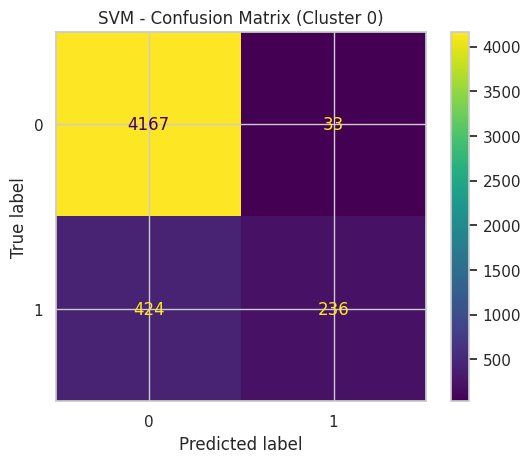


 SVM - Cluster 1 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7590
           1       1.00      0.07      0.13       154

    accuracy                           0.98      7744
   macro avg       0.99      0.54      0.56      7744
weighted avg       0.98      0.98      0.97      7744



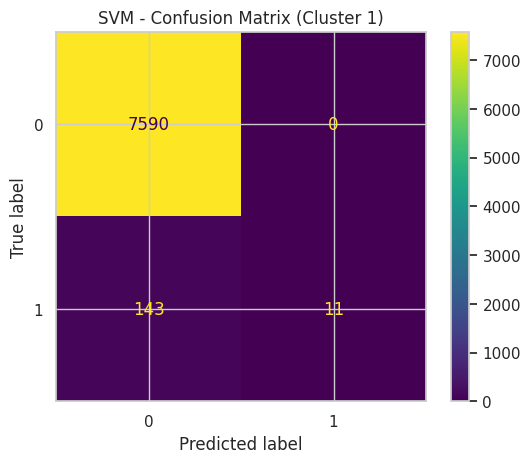


 SVM - Cluster 2 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5385
           1       1.00      0.01      0.02        85

    accuracy                           0.98      5470
   macro avg       0.99      0.51      0.51      5470
weighted avg       0.98      0.98      0.98      5470



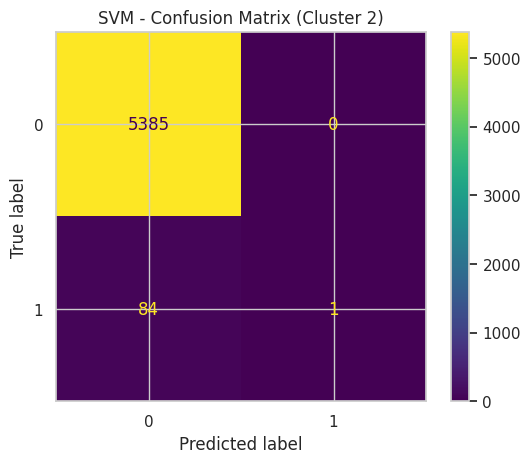

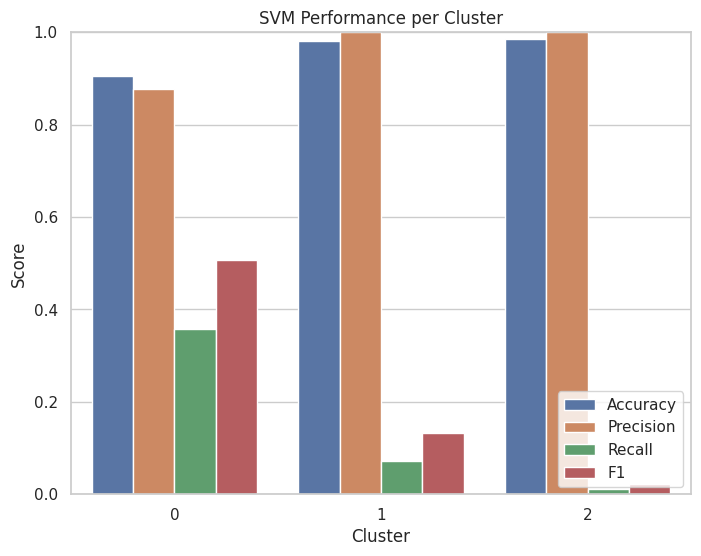

In [ ]:
# TA version

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_preds = {}

metrics_funcs = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred)
}

results_model = []
model_name = "SVM"

for cls_id in range(3):
    X_train, y_train = clusters_train[cls_id], clusters_y_train[cls_id]
    X_test_cls, y_test_cls = clusters_test[cls_id], clusters_y_test[cls_id]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test_cls)
    svm_preds[cls_id] = y_pred

    print(f"\n {model_name} - Cluster {cls_id} ")
    print(classification_report(y_test_cls, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test_cls, y_pred)
    plt.title(f"{model_name} - Confusion Matrix (Cluster {cls_id})")
    plt.show()

    metrics_values = {metric: func(y_test_cls, y_pred) for metric, func in metrics_funcs.items()}
    metrics_values["Cluster"] = cls_id
    results_model.append(metrics_values)

df_model = pd.DataFrame(results_model)
df_melted = pd.melt(df_model, id_vars=["Cluster"], var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Score", hue="Metric", data=df_melted)
plt.title(f"{model_name} Performance per Cluster")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


---
<font color="#ffcc00">Answer the following questions:

- What is the role of the kernel function in SVM?
- Why might SVM perform poorly on large datasets?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 4. XGBoost

XGBoost (Extreme Gradient Boosting) is an advanced ensemble algorithm based on the concept of gradient boosting.
It builds decision trees sequentially, where each new tree attempts to correct the errors made by the previous ones.  
XGBoost is known for its high performance, speed, and efficiency in handling structured or tabular datasets.

Implement an XGBoost classifier. Train and test the model for each cluster.

In [ ]:
# TODO


 XGBoost - Cluster 0 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4200
           1       0.99      0.52      0.68       660

    accuracy                           0.93      4860
   macro avg       0.96      0.76      0.82      4860
weighted avg       0.94      0.93      0.92      4860



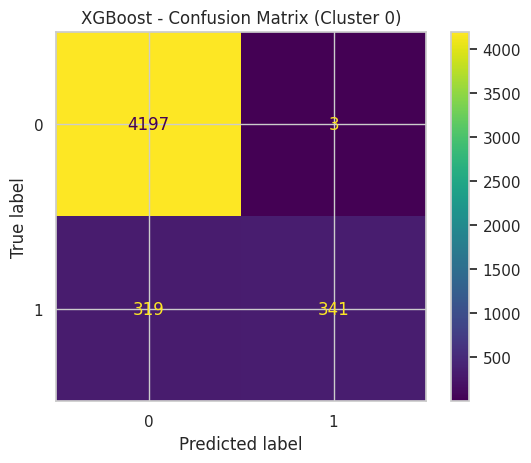


 XGBoost - Cluster 1 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7590
           1       1.00      0.45      0.62       154

    accuracy                           0.99      7744
   macro avg       0.99      0.72      0.81      7744
weighted avg       0.99      0.99      0.99      7744



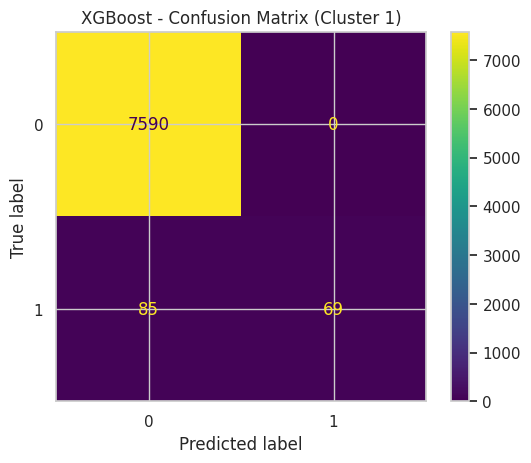


 XGBoost - Cluster 2 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5385
           1       1.00      0.38      0.55        85

    accuracy                           0.99      5470
   macro avg       1.00      0.69      0.77      5470
weighted avg       0.99      0.99      0.99      5470



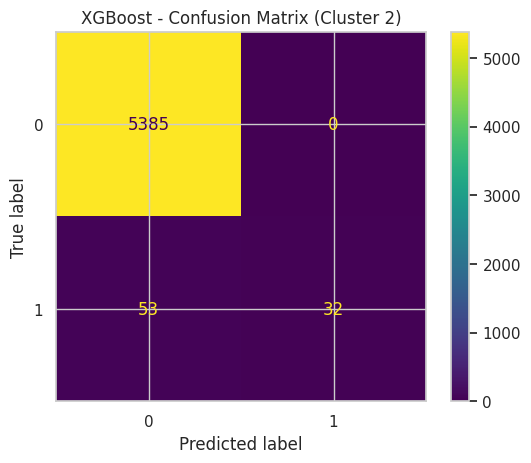

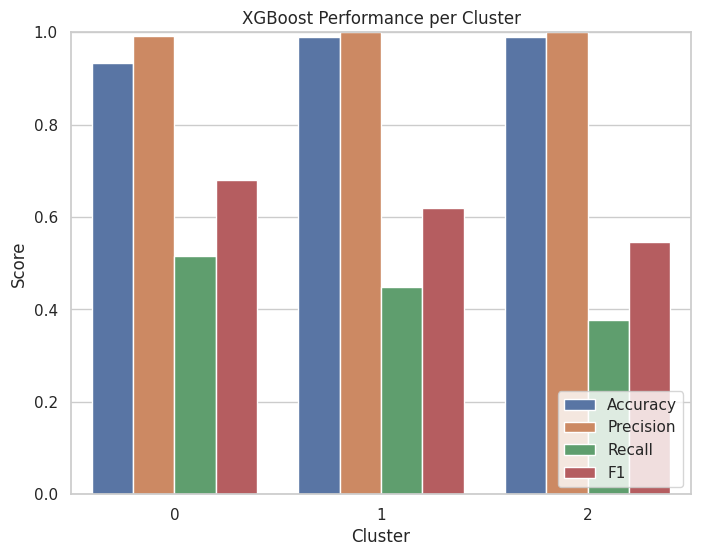

In [ ]:
# TA version

xgboost = XGBClassifier(
            n_estimators=100, max_depth=3, learning_rate=0.1,
            use_label_encoder=False, eval_metric='mlogloss', random_state=42
        )
xgb_preds = {}

metrics_funcs = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred)
}

results_model = []
model_name = "XGBoost"

for cls_id in range(3):
    X_train, y_train = clusters_train[cls_id], clusters_y_train[cls_id]
    X_test_cls, y_test_cls = clusters_test[cls_id], clusters_y_test[cls_id]

    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test_cls)
    xgb_preds[cls_id] = y_pred

    print(f"\n {model_name} - Cluster {cls_id} ")
    print(classification_report(y_test_cls, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test_cls, y_pred)
    plt.title(f"{model_name} - Confusion Matrix (Cluster {cls_id})")
    plt.show()

    metrics_values = {metric: func(y_test_cls, y_pred) for metric, func in metrics_funcs.items()}
    metrics_values["Cluster"] = cls_id
    results_model.append(metrics_values)

df_model = pd.DataFrame(results_model)
df_melted = pd.melt(df_model, id_vars=["Cluster"], var_name="Metric", value_name="Score")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Cluster", y="Score", hue="Metric", data=df_melted)
plt.title(f"{model_name} Performance per Cluster")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()


---
<font color="#ffcc00">Answer the following questions:

- What type of learning strategy does XGBoost use to improve its performance iteratively?
- How does XGBoost handle overfitting through parameters like max_depth and learning_rate?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Aggregated Model Performance

In this part, you will analyze the overall (aggregated) performance of each classification model across all clusters.
Instead of evaluating each cluster separately, you’ll combine all predictions and compute the total metrics.

Aggregated performance helps determine which model performs the best on average, across different subsets (clusters) of the dataset.
This is especially useful when:

- You want to assess model robustness and stability.  
- You want a single representative metric for each model.  
- You need to compare models that may perform well on one cluster but poorly on others.

In [ ]:
# TODO

                Model  Accuracy        F1  Precision    Recall
0  LogisticRegression  0.963760  0.504913   0.787736  0.371524
1        RandomForest  0.973774  0.653509   0.953092  0.497219
2                 SVM  0.962156  0.420339   0.882562  0.275862
3             XGBoost  0.974549  0.657738   0.993258  0.491657


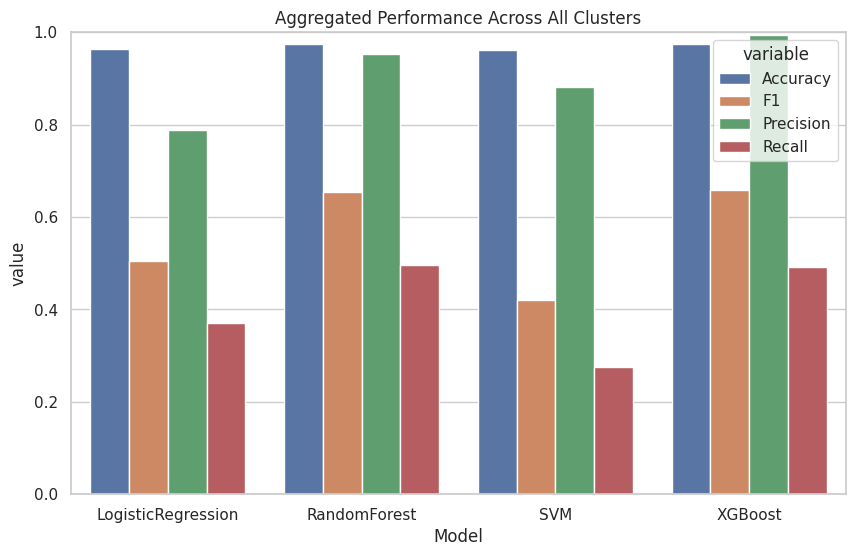

In [ ]:
# TA version

models_preds = {
    "LogisticRegression": logreg_preds,
    "RandomForest": rf_preds,
    "SVM": svm_preds,
    "XGBoost": xgb_preds
}

aggregated_results = []

for model_name, preds_dict in models_preds.items():
    y_true_all = np.concatenate([clusters_y_test[cls_id] for cls_id in preds_dict.keys()])
    y_pred_all = np.concatenate([preds_dict[cls_id] for cls_id in preds_dict.keys()])

    metrics_values = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true_all, y_pred_all),
        "F1": f1_score(y_true_all, y_pred_all),
        "Precision": precision_score(y_true_all, y_pred_all),
        "Recall": recall_score(y_true_all, y_pred_all)
    }

    aggregated_results.append(metrics_values)

df_agg = pd.DataFrame(aggregated_results)
print(df_agg)

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x="Model",
    y="value",
    hue="variable",
    data=pd.melt(df_agg, id_vars=["Model"], var_name="variable", value_name="value")
)
plt.title("Aggregated Performance Across All Clusters")
plt.ylim(0, 1)
plt.show()


---
<font color="#ffcc00">Answer the following questions:

- Which model achieved the highest overall accuracy when considering all clusters together?
- Which model demonstrates the most balanced performance across all metrics (Accuracy, Precision, Recall, and F1-score)?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Model Comparison


Now that you have trained, tuned, and evaluated several classification models on different patient clusters, it is time to compare their overall performance.
The purpose of this section is not to write additional code, but to analyze and interpret the results obtained from the previous evaluations.

---
<font color="#ffcc00">Answer the following questions:

- Are the results consistent with what you expected based on each model’s nature?
- How does model interpretability compare between Logistic Regression and XGBoost?
- In a medical decision-making setting, which would you prioritize — interpretability or predictive performance?
- If you were to deploy one model in a healthcare system to predict diabetes outcomes, which model would you choose and why?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Hyperparameter Tuning

Every machine learning model has a set of hyperparameters — parameters that are not learned directly from the data, but rather control the learning process itself.
Examples include the number of trees in a Random Forest, the learning rate in XGBoost, or the regularization strength in Logistic Regression.

Choosing optimal hyperparameter values is crucial because they can significantly affect model performance.
The process of finding the best combination of these hyperparameters is called hyperparameter tuning.

#### 1. Grid Search

Grid Search is a systematic and exhaustive method that evaluates all possible combinations of specified hyperparameter values.  
Although it guarantees testing every option, it can be computationally expensive, especially when there are many parameters or large value ranges.
Perform Grid Search on clusters considering the parameters in the next cell.

Note: The following Grid Search tests a limited range of hyperparameters to reduce computational cost while still allowing the model to explore different
tree depths and splitting strategies.After tuning, compare the best parameters and performance across clusters.

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [ ]:
# TODO

In [ ]:
# TA version

rf_base = RandomForestClassifier(random_state=42)

results_grid = []

for cls_id in range(3):
    print(f"\n Running GridSearchCV for Cluster {cls_id}...")

    X_train = clusters_train[cls_id]
    y_train = clusters_y_train[cls_id]
    X_test_cls = clusters_test[cls_id]
    y_test_cls = clusters_y_test[cls_id]

    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_rf.predict(X_test)

    metrics = {
        "Cluster": cls_id,
        "Best Params": best_params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }
    results_grid.append(metrics)

df_grid = pd.DataFrame(results_grid)
print("\n Grid Search Results per Cluster:")
print(df_grid)



 Running GridSearchCV for Cluster 0...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Running GridSearchCV for Cluster 1...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Running GridSearchCV for Cluster 2...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Grid Search Results per Cluster:
   Cluster                                        Best Params  Accuracy  \
0        0  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...   0.04974   
1        1  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   0.04974   
2        2  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   0.04974   

         F1  Precision  Recall  
0  0.094766    0.04974     1.0  
1  0.094766    0.04974     1.0  
2  0.094766    0.04974     1.0  


---
<font color="#ffcc00">Answer the following questions:

- Explain how Grid Search explores the hyperparameter space.
- Why can Grid Search become computationally expensive as the number of parameters increases?
- When is Grid Search preferable to Randomized Search?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 2. Randomized Search

Randomized Search selects a random subset of combinations from the defined hyperparameter grid.  
It is faster than Grid Search and can still yield good results, especially when some parameters have less influence on model performance.

Perform Randomized Search on the model with best aggregated performance.

In [ ]:
# TODO

In [ ]:
# TA verison

base_model = XGBClassifier(random_state=42)

base_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.3),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5)
}

results_randomized = []

for cls_id in range(3):
    print(f"\n Running RandomizedSearchCV for Cluster {cls_id}...")

    X_train = clusters_train[cls_id]
    y_train = clusters_y_train[cls_id]
    X_test_cls = clusters_test[cls_id]
    y_test_cls = clusters_y_test[cls_id]

    random_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_dist,
        n_iter=20,
        scoring='accuracy',
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    y_pred = best_model.predict(X_test)

    metrics = {
        "Cluster": cls_id,
        "Best Params": best_params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }
    results_randomized.append(metrics)

df_randomized = pd.DataFrame(results_randomized)
print("\n Randomized Search Results per Cluster:")
print(df_randomized)



 Running RandomizedSearchCV for Cluster 0...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for Cluster 1...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for Cluster 2...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Randomized Search Results per Cluster:
   Cluster                                        Best Params  Accuracy  \
0        0  {'colsample_bytree': 0.9085081386743783, 'gamm...   0.04974   
1        1  {'colsample_bytree': 0.8439986631130484, 'gamm...   0.04974   
2        2  {'colsample_bytree': 0.9369139098379994, 'gamm...   0.04974   

         F1  Precision  Recall  
0  0.094766    0.04974     1.0  
1  0.094766    0.04974     1.0  
2  0.094766    0.04974     1.0  


---
<font color="#ffcc00">Answer the following questions:

- What is the main advantage of Randomized Search over Grid Search?
- If Randomized Search samples fewer combinations, how does it still maintain reasonable performance?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### 3. Bayesian Optimization

Bayesian Optimization is a smarter way of tuning hyperparameters. It builds a model of the performance (objective function) based on past results and decides which hyperparameters to try next by predicting which ones might work better. Libraries like Optuna or Hyperopt help automate this process.

---
<font color="#ffcc00">Answer the following questions:

- In simple terms, how does Bayesian Optimization decide which hyperparameters to try next?
- Why can Bayesian Optimization be more efficient than both Grid and Randomized Search?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

# Classification on the Whole Dataset



In the previous sections, we applied clustering to identify natural groupings in our diabetes dataset and then trained separate classifiers for each cluster. This approach assumes that different patient subgroups may have distinct risk patterns for diabetes.

However, it's also important to evaluate how well our classification models perform when trained on the entire dataset without any clustering preprocessing. This approach treats all patients as a single homogeneous group and can help us understand:

- **Baseline Performance**: How well can we predict diabetes using all available features without subgroup analysis?
- **Model Comparison**: Which algorithms perform best when given access to the complete feature space?
- **Feature Importance**: What are the most predictive features across the entire population?
- **Clustering Impact**: How does the cluster-based approach compare to the traditional whole-dataset approach?

This section will implement the same classification algorithms (Logistic Regression, Random Forest, SVM, and XGBoost) but train them on the complete preprocessed dataset rather than on individual clusters.

We will use the scaled data from the preprocessing section (X_train_resampled_scaled and X_test_scaled) rather than the PCA-transformed data. This allows the models to have access to all original features and their interactions.

## Hyperparameter Optimization with Optuna

In the previous clustering section, we used Grid Search and Randomized Search for hyperparameter tuning. However, these methods have limitations:

- **Grid Search**: Exhaustive but computationally expensive
- **Randomized Search**: Faster but may miss optimal combinations

As mentioned previously, Bayesian Optimization is a smarter way of tuning hyperparameters. **Optuna** is a modern hyperparameter optimization framework that uses **Bayesian Optimization** and **Tree-structured Parzen Estimator (TPE)** algorithms to efficiently find optimal hyperparameters.

---
<font color="#ffcc00">Answer the following questions:

- What is the main difference between Optuna's TPE algorithm and random search?
- Why might Optuna be more efficient than Grid Search for hyperparameter optimization?
- In what scenarios would you prefer Optuna over traditional hyperparameter tuning methods?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>


### 1. Logistic Regression with Optuna




For Logistic Regression, we need to optimize several key hyperparameters:

**Core Parameters:**
- **C**: Regularization strength (inverse of regularization parameter)
- **solver**: Algorithm to use for optimization
- **penalty**: Type of regularization (l1, l2, elasticnet)
- **max_iter**: Maximum number of iterations for convergence

**Advanced Parameters:**
- **l1_ratio**: Mixing parameter for elasticnet penalty (only used with saga solver)

**Parameter Compatibility:**
- **liblinear**: Supports l1, l2 penalties
- **lbfgs**: Supports only l2 penalty  
- **saga**: Supports l1, l2, elasticnet penalties

#### Implement Optuna Optimization for Logistic Regression


Your task is to implement Optuna optimization for Logistic Regression with the following requirements:

**Parameter Grid to Optimize:**
- **C**: uniform(0.001, 10.0)
- **solver**: categorical(['liblinear', 'lbfgs', 'saga'])
- **max_iter**: randint(100, 1000)
- **penalty**: categorical(['l1', 'l2', 'elasticnet'])
- **l1_ratio**: uniform(0.0, 1.0)

**Objective Function Requirements:**
1. **Parameter Definition**: Use the fixed parameter grid with compatible solver-penalty combinations
2. **Solver-Penalty Compatibility**: Ensure only valid combinations are suggested:
   - liblinear → l1, l2 penalties
   - lbfgs → l2 penalty only
   - saga → l1, l2, elasticnet penalties
3. **Cross-Validation**: Use 3-fold cross-validation with F1-score as the optimization metric
4. **Study Creation**: Create an Optuna study with TPE sampler for 15 trials

In [ ]:
# TODO

In [ ]:
def objective_logistic(trial):
    params = {
        'C': trial.suggest_float('C', 0.001, 10.0, log=True),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'random_state': 42
    }


    solver_penalty = trial.suggest_categorical('solver_penalty', [
        ('liblinear', 'l1'),
        ('liblinear', 'l2'),
        ('lbfgs', 'l2'),
        ('saga', 'l1'),
        ('saga', 'l2'),
        ('saga', 'elasticnet')
    ])

    params['solver'] = solver_penalty[0]
    params['penalty'] = solver_penalty[1]

    if solver_penalty[1] == 'elasticnet':
        params['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)

    model = LogisticRegression(**params)
    scores = cross_val_score(model, X_train_resampled_scaled, y_resampled, cv=3, scoring='f1',)
    return scores.mean()

study_logistic = optuna.create_study(direction='maximize', sampler=TPESampler())
study_logistic.optimize(objective_logistic, n_trials=15)

print("Best parameters for Logistic Regression:", study_logistic.best_params)
print("Best F1 score:", study_logistic.best_value)

[I 2025-10-21 15:12:27,652] A new study created in memory with name: no-name-ae8b8158-df68-47be-a59c-4dfad37b3eed
[I 2025-10-21 15:12:28,761] Trial 0 finished with value: 0.36295910143262167 and parameters: {'C': 0.003353280085490308, 'max_iter': 324, 'solver_penalty': ('liblinear', 'l1')}. Best is trial 0 with value: 0.36295910143262167.
[I 2025-10-21 15:12:35,859] Trial 1 finished with value: 0.48005364241259124 and parameters: {'C': 0.010927570090744366, 'max_iter': 589, 'solver_penalty': ('saga', 'l2')}. Best is trial 1 with value: 0.48005364241259124.
[I 2025-10-21 15:12:37,301] Trial 2 finished with value: 0.3419743361535234 and parameters: {'C': 0.003239896575372974, 'max_iter': 974, 'solver_penalty': ('liblinear', 'l2')}. Best is trial 1 with value: 0.48005364241259124.
[I 2025-10-21 15:12:38,410] Trial 3 finished with value: 0.17992655641973276 and parameters: {'C': 0.0010065077303430476, 'max_iter': 367, 'solver_penalty': ('liblinear', 'l2')}. Best is trial 1 with value: 0.48

Best parameters for Logistic Regression: {'C': 6.735998746807512, 'max_iter': 982, 'solver_penalty': ('saga', 'l1')}
Best F1 score: 0.5151274083881033


#### Train and Evaluate the Best Logistic Regression Model

Your task is to train and evaluate the Optuna-optimized Logistic Regression model with best parameters from the Optuna study and then calculate metrics and display the results. Also plot the confusion matrix.

In [ ]:
# TODO

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17175
           1       0.79      0.37      0.50       899

    accuracy                           0.96     18074
   macro avg       0.88      0.68      0.74     18074
weighted avg       0.96      0.96      0.96     18074

  Accuracy: 96.37%
  Precision: 79.14%
  Recall: 36.71%
  F1 Score: 50.15%


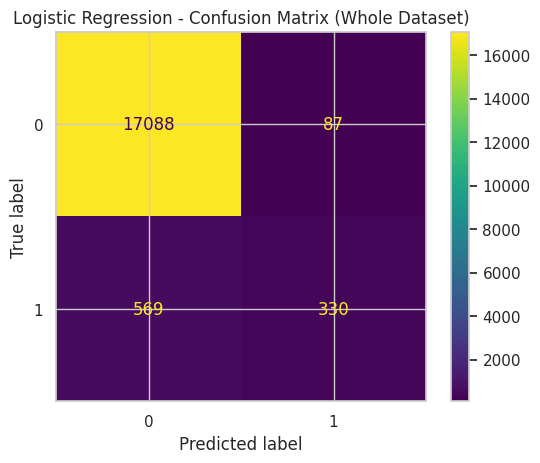

In [ ]:
best_logistic_params = study_logistic.best_params.copy()

solver, penalty = best_logistic_params.pop('solver_penalty')
best_logistic_params['solver'] = solver
best_logistic_params['penalty'] = penalty

if penalty == 'elasticnet' and 'l1_ratio' not in best_logistic_params:
    best_logistic_params['l1_ratio'] = 0.5

best_logistic = LogisticRegression(**best_logistic_params, random_state=42)
best_logistic.fit(X_train_resampled_scaled, y_resampled)
y_pred_logistic = best_logistic.predict(X_test_scaled)


print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print(f"  Accuracy: {accuracy_score(y_test, y_pred_logistic) * 100:.2f}%")
print(f"  Precision: {precision_score(y_test, y_pred_logistic, zero_division=0) * 100:.2f}%")
print(f"  Recall: {recall_score(y_test, y_pred_logistic, zero_division=0) * 100:.2f}%")
print(f"  F1 Score: {f1_score(y_test, y_pred_logistic, zero_division=0) * 100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic)
plt.title('Logistic Regression - Confusion Matrix (Whole Dataset)')
plt.show()

---
<font color="#ffcc00">**Logistic Regression with Optuna vs Cluster-Based Classification:**

Based on the Logistic Regression results shown above, answer the following questions by comparing with the cluster-based Logistic Regression results from the previous sections:

- **Hyperparameter Optimization Impact**: How does using Optuna for hyperparameter optimization compare to using default parameters in the
cluster-based Logistic Regression models? What improvements do you observe?

- **Performance Comparison**: Compare the accuracy, precision, recall, and F1-scores between:
  - The Optuna-optimized Logistic Regression on the whole dataset (results shown above)
  - The aggregated performance of cluster-based Logistic Regression models
  - Which approach performs better overall and why?

- **Optimization Strategy**:
  - How might the optimal hyperparameters differ between the whole dataset approach vs. individual clusters?

- **Methodology Evaluation**: Given these results, would you recommend using Optuna for hyperparameter optimization in future medical classification tasks? Justify your answer based on the performance improvements observed.

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>


### 2. Random Forest with Optuna

For Random Forest, we need to optimize several key hyperparameters:

**Core Parameters:**
- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum depth of individual trees
- **min_samples_split**: Minimum samples required to split an internal node
- **min_samples_leaf**: Minimum samples required to be at a leaf node

**Advanced Parameters:**
- **max_features**: Number of features to consider when looking for the best split
- **bootstrap**: Whether bootstrap samples are used when building trees

#### Implement Optuna Optimization for Random Forest

Your task is to implement Optuna optimization for Random Forest with the following requirements:

**Parameter Grid to Optimize:**
- **n_estimators**: rcategorical([50, 100, 150, 200])
- **max_depth**: categorical([None, 10, 20])  
- **min_samples_split**: categorical([2, 5, 10])
- **min_samples_leaf**: categorical([1, 2, 4])
- **max_features**: categorical(['sqrt', 'log2', None])
- **bootstrap**: categorical([True, False])

**Implementation Setup:**
1. Define the objective function with proper parameter handling
3. Cross-Validation: Use 3-fold cross-validation with F1-score as the optimization metric
4. Study Creation: Create an Optuna study with TPE sampler for 15 trials

In [ ]:
# TODO

In [ ]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 150, 200]),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5 ,10]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 2 , 4]),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)

    # Faster cross-validation
    scores = cross_val_score(model, X_train_resampled_scaled, y_resampled, cv=3, scoring='f1')
    return scores.mean()

# Create Optuna study
study_rf = optuna.create_study(direction='maximize', sampler=TPESampler())

# Run fewer trials for speed
study_rf.optimize(objective_rf, n_trials=15)

# Best results
print("Best parameters for Random Forest:", study_rf.best_params)
print("Best F1 score:", study_rf.best_value)

[I 2025-10-21 15:13:33,936] A new study created in memory with name: no-name-94b87c05-9939-44ad-b845-505bcd79ce59
[I 2025-10-21 15:13:57,046] Trial 0 finished with value: 0.6497145993400565 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6497145993400565.
[I 2025-10-21 15:14:11,443] Trial 1 finished with value: 0.6499959028875916 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.6499959028875916.
[I 2025-10-21 15:14:28,061] Trial 2 finished with value: 0.649824467304649 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6499959028875916.
[I 2025-10-21 15:14:51,433] Trial 3 finished with value: 0.6501046459627

Best parameters for Random Forest: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}
Best F1 score: 0.650205013470699


#### Train and Evaluate the Best Random Forest Model

Your task is to train and evaluate the Optuna-optimized Random Forest model with best parameters from the Optuna study and then calculate metrics and display the results. Also plot the confusion matrix.

In [ ]:
# TODO

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17175
           1       1.00      0.49      0.66       899

    accuracy                           0.97     18074
   macro avg       0.99      0.74      0.82     18074
weighted avg       0.98      0.97      0.97     18074

  Accuracy: 97.45%
  Precision: 99.77%
  Recall: 48.83%
  F1 Score: 65.57%


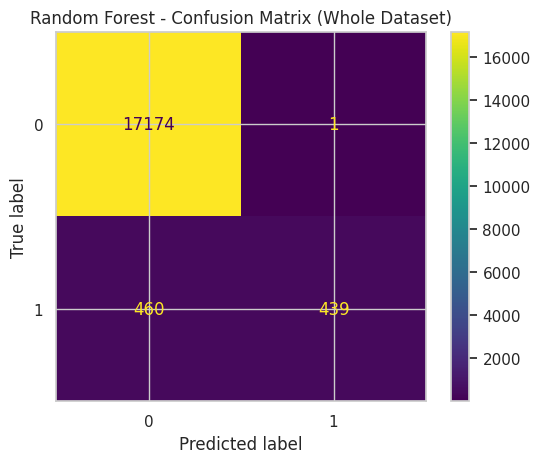

In [ ]:
best_rf_params = study_rf.best_params.copy()

best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_resampled_scaled, y_resampled)

y_pred_rf = best_rf.predict(X_test_scaled)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"  Precision: {precision_score(y_test, y_pred_rf, zero_division=0) * 100:.2f}%")
print(f"  Recall: {recall_score(y_test, y_pred_rf, zero_division=0) * 100:.2f}%")
print(f"  F1 Score: {f1_score(y_test, y_pred_rf, zero_division=0) * 100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Random Forest - Confusion Matrix (Whole Dataset)')
plt.show()


---
<font color="#ffcc00">Random Forest with Optuna vs Cluster-Based Classification:

Based on the Random Forest results, answer the following questions by comparing with the cluster-based Random Forest results from the previous sections:

- **Hyperparameter Optimization Impact**: How does using Optuna for hyperparameter optimization compare to using default parameters in the cluster-based Random Forest models? What improvements do you observe?
- **Performance Comparison**: Compare the accuracy, precision, recall, and F1-scores between:
  - The Optuna-optimized Random Forest on the whole dataset
  - The aggregated performance of cluster-based Random Forest models
  - Which approach performs better overall and why?
- **Optimization Strategy**:
  - What specific hyperparameters did Optuna optimize for Random Forest that weren't tuned in the cluster-based approach?
  - How might the optimal hyperparameters differ between the whole dataset approach vs. individual clusters?
- **Methodology Evaluation**: Given these results, would you recommend using Optuna for Random Forest hyperparameter optimization in future medical classification tasks? Justify your answer based on the performance improvements observed.

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>


### 3. Support Vector Machine with Optuna

For SVM, we need to optimize several key hyperparameters:

**Core Parameters:**
- **C**: Regularization parameter (controls the trade-off between margin and classification error)
- **gamma**: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels
- **kernel**: Kernel type to be used in the algorithm

**Advanced Parameters:**
- **degree**: Degree of polynomial kernel (only for 'poly' kernel)

**Kernel-Specific Considerations:**
- **RBF**: Most commonly used, works well with default gamma='scale'
- **Polynomial**: Good for data with polynomial relationships
- **Sigmoid**: Similar to RBF but with different mathematical properties


#### Implement Optuna Optimization for SVM

Your task is to implement Optuna optimization for SVM with the following requirements:

**Parameter Grid to Optimize:**
- **C**: categorial([0.1, 1, 10, 50])
- **gamma**: categorical(['scale', 'auto', 0.01, 0.1])
- **kernel**: categorical(['rbf', 'poly'])
- **degree**: categorical([2, 3])

**Implementation Setup:**
1. Define the objective function with proper parameter handling
3. Cross-Validation: Use 3-fold cross-validation with F1-score as the optimization metric
4. Study Creation: Create an Optuna study with TPE sampler for 7 trials

In [ ]:
# TODO

In [ ]:
def objective_svm(trial):
    params = {
        'C': trial.suggest_categorical('C', [0.1, 1, 10, 50]),
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'poly']),
        'degree': trial.suggest_categorical('degree', [2, 3]),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto', 0.01, 0.1])
    }

    model = SVC(**params, random_state=42)
    scores = cross_val_score(model, X_train_resampled_scaled, y_resampled, cv=3, scoring='f1')
    return scores.mean()

study_svm = optuna.create_study(direction='maximize', sampler=TPESampler())
study_svm.optimize(objective_svm, n_trials=3)

print("Best parameters for SVM:", study_svm.best_params)
print("Best F1 score:", study_svm.best_value)


[I 2025-10-21 15:29:20,507] A new study created in memory with name: no-name-bc8e6aa1-6a63-497d-967b-354192dca278
[I 2025-10-21 15:30:54,685] Trial 0 finished with value: 0.367811384813917 and parameters: {'C': 10, 'kernel': 'poly', 'degree': 2, 'gamma': 0.01}. Best is trial 0 with value: 0.367811384813917.
[I 2025-10-21 15:32:24,871] Trial 1 finished with value: 0.48337473069753684 and parameters: {'C': 50, 'kernel': 'poly', 'degree': 3, 'gamma': 0.01}. Best is trial 1 with value: 0.48337473069753684.
[I 2025-10-21 15:33:56,682] Trial 2 finished with value: 0.48659368085876276 and parameters: {'C': 1, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto'}. Best is trial 2 with value: 0.48659368085876276.


Best parameters for SVM: {'C': 1, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto'}
Best F1 score: 0.48659368085876276


#### Train and Evaluate the Best SVM Model

After finding the optimal hyperparameters through Optuna, we need to train and evaluate the Optuna-optimized SVM model with best parameters from the Optuna study and then calculate metrics and display the results. Also plot the confusion matrix.

In [ ]:
# TODO

SVM Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17175
           1       0.89      0.36      0.51       899

    accuracy                           0.97     18074
   macro avg       0.93      0.68      0.75     18074
weighted avg       0.96      0.97      0.96     18074

  Accuracy: 96.60%
  Precision: 89.26%
  Recall: 36.04%
  F1 Score: 51.35%


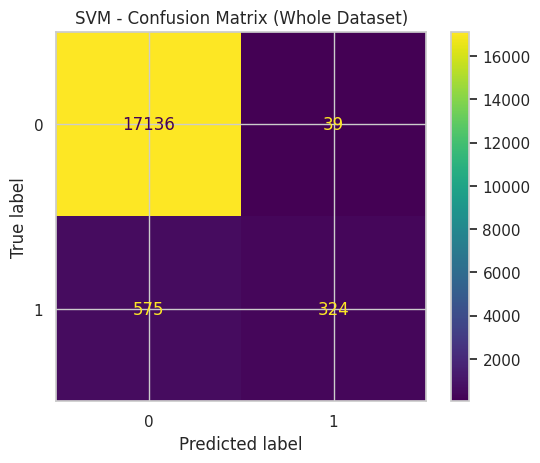

In [ ]:
best_svm_params = study_svm.best_params.copy()

best_svm = SVC(**best_svm_params, random_state=42)
best_svm.fit(X_train_resampled_scaled, y_resampled)

y_pred_svm = best_svm.predict(X_test_scaled)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print(f"  Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print(f"  Precision: {precision_score(y_test, y_pred_svm, zero_division=0) * 100:.2f}%")
print(f"  Recall: {recall_score(y_test, y_pred_svm, zero_division=0) * 100:.2f}%")
print(f"  F1 Score: {f1_score(y_test, y_pred_svm, zero_division=0) * 100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title('SVM - Confusion Matrix (Whole Dataset)')
plt.show()


---
<font color="#ffcc00">SVM with Optuna vs Cluster-Based Classification:

Based on the SVM results, answer the following questions by comparing with the cluster-based SVM results from the previous sections:

- **Hyperparameter Optimization Impact**: How does using Optuna for hyperparameter optimization compare to using default parameters in the cluster-based SVM models? What improvements do you observe?
- **Performance Comparison**: Compare the accuracy, precision, recall, and F1-scores between:
  - The Optuna-optimized SVM on the whole dataset
  - The aggregated performance of cluster-based SVM models
  - Which approach performs better overall and why?
- **Optimization Strategy**:
  - What specific hyperparameters did Optuna optimize for SVM that weren't tuned in the cluster-based approach?
  - How might the optimal hyperparameters differ between the whole dataset approach vs. individual clusters?
- **Methodology Evaluation**: Given these results, would you recommend using Optuna for SVM hyperparameter optimization in future medical classification tasks? Justify your answer based on the performance improvements observed.

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>


### 4. XGBoost with Optuna

For XGBoost, we need to optimize several key hyperparameters:

**Core Parameters:**
- **n_estimators**: Number of boosting rounds
- **max_depth**: Maximum depth of individual trees
- **learning_rate**: Step size shrinkage used to prevent overfitting

**Advanced Parameters:**
- **subsample**: Subsample ratio of training instances
- **colsample_bytree**: Subsample ratio of columns when constructing each tree
- **gamma**: Minimum loss reduction required to make a further partition


#### Implement Optuna Optimization for XGBoost

Your task is to implement Optuna optimization for XGBoost with the following requirements:

**Parameter Grid to Optimize:**
- **n_estimators**: randint(50, 300)
- **max_depth**: randint(3, 10)
- **learning_rate**: uniform(0.01, 0.3)
- **subsample**: uniform(0.6, 1.0)
- **colsample_bytree**: uniform(0.6, 1.0)
- **gamma**: uniform(0, 0.5)

**Implementation Setup:**
1. Define the objective function with proper parameter handling
3. Cross-Validation: Use 3-fold cross-validation with F1-score as the optimization metric
4. Study Creation: Create an Optuna study with TPE sampler for 15 trials

In [ ]:
# TODO

In [ ]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params, n_jobs=-1)

    scores = cross_val_score(model, X_train_resampled_scaled, y_resampled,
                             cv=3, scoring='f1')

    return scores.mean()

study_xgb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_xgb.optimize(objective_xgb, n_trials=15)

print("Best parameters for XGBoost:", study_xgb.best_params)
print("Best F1 score:", study_xgb.best_value)


[I 2025-10-21 15:27:14,008] A new study created in memory with name: no-name-2d923047-3ae5-4140-a091-60f035296cb4
[I 2025-10-21 15:27:21,979] Trial 0 finished with value: 0.6512020387137248 and parameters: {'n_estimators': 109, 'max_depth': 6, 'learning_rate': 0.09721086862423915, 'subsample': 0.9880764985605058, 'colsample_bytree': 0.6295685851706166, 'gamma': 0.43362408041656936}. Best is trial 0 with value: 0.6512020387137248.
[I 2025-10-21 15:27:23,731] Trial 1 finished with value: 0.6508659848528314 and parameters: {'n_estimators': 95, 'max_depth': 6, 'learning_rate': 0.0443842818309636, 'subsample': 0.7505766531059027, 'colsample_bytree': 0.7969816673470815, 'gamma': 0.2833359160995034}. Best is trial 0 with value: 0.6512020387137248.
[I 2025-10-21 15:27:26,204] Trial 2 finished with value: 0.6466816208809325 and parameters: {'n_estimators': 131, 'max_depth': 7, 'learning_rate': 0.18341995907838696, 'subsample': 0.9138571589970239, 'colsample_bytree': 0.7910545648510774, 'gamma':

Best parameters for XGBoost: {'n_estimators': 142, 'max_depth': 3, 'learning_rate': 0.14694708424413452, 'subsample': 0.6472211768517382, 'colsample_bytree': 0.9194451241459893, 'gamma': 0.012160308110203855}
Best F1 score: 0.6547180968681597


#### Train and Evaluate the Best XGBoost Model

After finding the optimal hyperparameters through Optuna, we need to train and evaluate the Optuna-optimized XGBoost model with best parameters from the Optuna study and then calculate metrics and display the results. Also plot the confusion matrix.

In [ ]:
# TODO

XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17175
           1       0.98      0.51      0.67       899

    accuracy                           0.97     18074
   macro avg       0.98      0.75      0.83     18074
weighted avg       0.98      0.97      0.97     18074

  Accuracy: 97.49%
  Precision: 97.85%
  Recall: 50.72%
  F1 Score: 66.81%


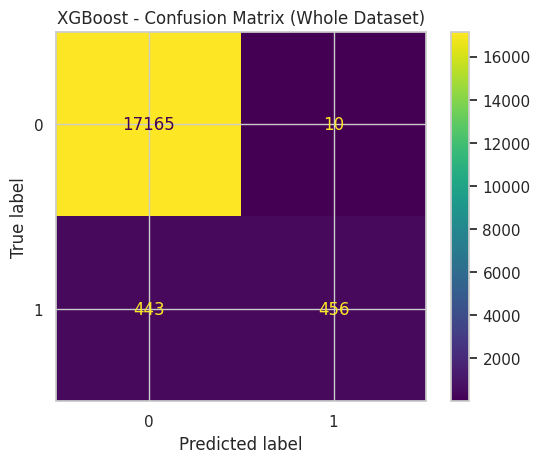

In [ ]:
best_xgb_params = study_xgb.best_params.copy()

best_xgb = XGBClassifier(**best_xgb_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train_resampled_scaled, y_resampled)

y_pred_xgb = best_xgb.predict(X_test_scaled)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"  Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print(f"  Precision: {precision_score(y_test, y_pred_xgb, zero_division=0) * 100:.2f}%")
print(f"  Recall: {recall_score(y_test, y_pred_xgb, zero_division=0) * 100:.2f}%")
print(f"  F1 Score: {f1_score(y_test, y_pred_xgb, zero_division=0) * 100:.2f}%")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title('XGBoost - Confusion Matrix (Whole Dataset)')
plt.show()

---
<font color="#ffcc00">XGBoost with Optuna vs Cluster-Based Classification:

Based on the XGBoost results, answer the following questions by comparing with the cluster-based XGboost results from the previous sections:

- **Hyperparameter Optimization Impact**: How does using Optuna for hyperparameter optimization compare to using default parameters in the cluster-based XGBoost models? What improvements do you observe?
- **Performance Comparison**: Compare the accuracy, precision, recall, and F1-scores between:
  - The Optuna-optimized XGBoost on the whole dataset
  - The aggregated performance of cluster-based XGBoost models
  - Which approach performs better overall and why?
- **Optimization Strategy**:
  - What specific hyperparameters did Optuna optimize for XGBoost that weren't tuned in the cluster-based approach?
  - How might the optimal hyperparameters differ between the whole dataset approach vs. individual clusters?
- **Methodology Evaluation**: Given these results, would you recommend using Optuna for XGBoost hyperparameter optimization in future medical classification tasks? Justify your answer based on the performance improvements observed.

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>


## Model Comparison and Analysis


In this section, we perform a high-level comparison of model performance:

1. **Whole Dataset Models:**  
   Evaluate and compare models (Logistic Regression, Random Forest, SVM, XGBoost) trained on the full dataset.

2. **Cluster-Based Models:**  
   Assess models trained separately on each cluster and compare their averaged metrics against whole-dataset models.

3. **Visualization:**  
   Summarize and plot F1-scores and other key metrics to analyze differences between whole-dataset and cluster-based approaches.


### 1. Collect and Organize Results

- For each model trained on the whole dataset:
  - Compare predicted labels against the true labels for the entire dataset.
  - Compute standard classification metrics: Accuracy, F1 score, Precision, and Recall.
  - Store the results in a structured table with a column indicating these are whole-dataset results.

- For the cluster-based approach:
  - Ensure the existing evaluation results are in a similar structured table.
  - Add a column to indicate that these are cluster-based results.

- Combine both tables into a single table to facilitate comparison of all models across both approaches.

In [ ]:
# TODO

In [ ]:
models_whole = {
    "LogisticRegression": y_pred_logistic,
    "RandomForest": y_pred_rf,
    "SVM": y_pred_svm,
    "XGBoost": y_pred_xgb
}

results_whole = []

for model_name, y_pred in models_whole.items():
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Type": "Whole Dataset"
    }
    results_whole.append(metrics)

df_whole = pd.DataFrame(results_whole)

df_cluster = df_agg.copy()
df_cluster["Type"] = "Cluster-Based"

comparison_df = pd.concat([df_whole, df_cluster], ignore_index=True)
display(comparison_df)


,Model,Accuracy,F1,Precision,Recall,Type
0,LogisticRegression,0.963705,0.501520,0.791367,0.367075,Whole Dataset
1,RandomForest,0.974494,0.655713,0.997727,0.488320,Whole Dataset
2,SVM,0.966029,0.513471,0.892562,0.360400,Whole Dataset
3,XGBoost,0.974936,0.668132,0.978541,0.507230,Whole Dataset
4,LogisticRegression,0.963760,0.504913,0.787736,0.371524,Cluster-Based
5,RandomForest,0.973774,0.653509,0.953092,0.497219,Cluster-Based
6,SVM,0.962156,0.420339,0.882562,0.275862,Cluster-Based
7,XGBoost,0.974549,0.657738,0.993258,0.491657,Cluster-Based


### 2. Create Comprehensive Comparison Plots

- Prepare a table where each row contains the F1 score for a specific model and evaluation type (Whole Dataset vs Cluster-Based).

- Create a grouped barplot:
  - X-axis: Model names (e.g., XGBoost, SVM, Random Forest, Logistic Regression).
  - Y-axis: F1 score.
  - Use different colors to distinguish between Whole Dataset and Cluster-Based evaluation.
- Make the plot readable:
  - Add a descriptive title and y-axis label.
  - Set the y-axis limits between 0 and 1.
  - Rotate x-axis labels if the model names overlap.


In [ ]:
# TODO

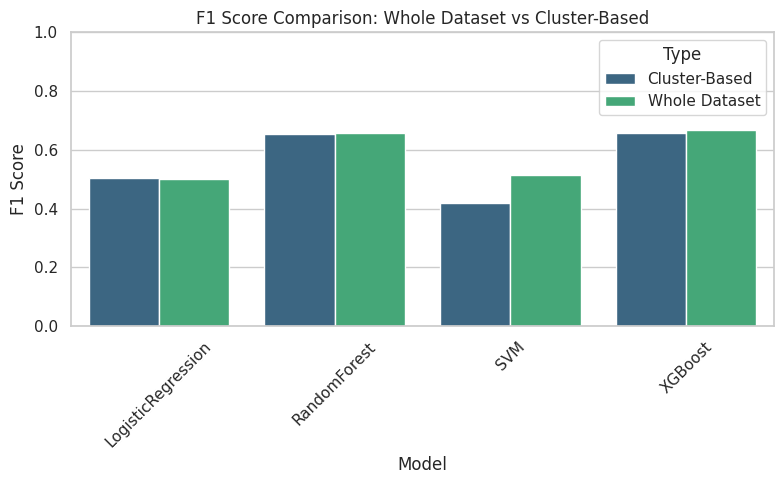

In [ ]:
f1_df = comparison_df.pivot(index='Model', columns='Type', values='F1').reset_index()

f1_melted = pd.melt(f1_df, id_vars='Model', var_name='Type', value_name='F1')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(
    data=f1_melted,
    x='Model',
    y='F1',
    hue='Type',
    palette='viridis'
)

plt.title('F1 Score Comparison: Whole Dataset vs Cluster-Based')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
<font color="#ffcc00">**Final Analysis Questions:**

Based on your comprehensive analysis, answer the following questions:

1. **Model Performance Analysis**: Which model performed best overall? What factors contributed to its success?

2. **Approach Comparison**: How do the pure classification results compare with the cluster-based approach? Which method would you recommend for this diabetes prediction task?

3. **Medical Application**: Considering this is a medical classification task, which approach would be most suitable for deployment in a healthcare setting? Consider factors like interpretability, reliability, and clinical utility.

4. **Future Improvements**: What additional techniques or modifications would you suggest to further improve the classification performance?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>
